In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
os.chdir('D:\\Users\\sergi\\OneDrive\\Desktop\\0. Manchester\\0. Courses\\Personal projects\\MCDonalds Unsupervised')

### I. Set Up and DataCleaning

In [2]:
mcdonalds=pd.read_csv('mcdonaldata.csv')
mcdonalds.drop('Unnamed: 0',axis=1,inplace=True)
mcdonalds.rename(columns={'protien':'protein'},inplace=True)
mcdonalds.info() #Non Null values - Notice that Calories and Serversize are coded as objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   item        141 non-null    object 
 1   servesize   141 non-null    object 
 2   calories    141 non-null    object 
 3   protein     141 non-null    float64
 4   totalfat    141 non-null    float64
 5   satfat      141 non-null    float64
 6   transfat    141 non-null    float64
 7   cholestrol  141 non-null    float64
 8   carbs       141 non-null    float64
 9   sugar       141 non-null    float64
 10  addedsugar  141 non-null    float64
 11  sodium      141 non-null    float64
 12  menu        141 non-null    object 
dtypes: float64(9), object(4)
memory usage: 14.4+ KB


In [3]:
mcdonalds

item servesize calories  protein  totalfat  satfat  \
0           McVeggie Burger      168       402    10.24     13.83    5.34   
1       McAloo Tikki Burger      146       339     8.50     11.31    4.27   
2    McSpicy Paneer Burger      199       652    20.29     39.45   17.12   
3         Spicy Paneer Wrap      250       674    20.96     39.10   19.73   
4       American Veg Burger      177       512    15.30     23.45   10.51   
..                      ...       ...      ...      ...       ...     ...   
136  Tomato Ketchup Sachets         8    11.23     0.08     23.45    0.38   
137             Maple Syrup         3     86.4     0.00      0.00    0.00   
138            Cheese Slice        14    51.03     3.06      3.99    0.00   
139              Sweet Corn        40    45.08     1.47      1.00    2.89   
140    Mixed Fruit Beverage       180    72.25     0.65      0.02    0.22   

     transfat  cholestrol  carbs  sugar  addedsugar   sodium        menu  
0        0.16        2.49  56.54   7.90        4.49   706.13     regular  
1        0.20        1.47   5.27   7.05        4.07   545.34     regular  
2        0.18       21.85  52.33   8.35        5.27  1074.58     regular  
3        0.26       40.93  59.27   3.50        1.08  1087.46     regular  
4        0.17       25.24  56.96   7.85        4.76  1051.24     regular  
..        ...         ...    ...    ...         ...      ...         ...  
136      0.25        0.08   2.63   2.33        1.64   414.71  condiments  
137      0.40        0.30  21.60  16.20        5.34    71.05  condiments  
138      0.00       13.43   0.72   0.54        0.00    15.00  condiments  
139      0.01        2.00   7.55   2.54        0.00   178.95  condiments  
140      0.04        0.01  18.00  16.83        0.00     0.04  condiments  

[141 rows x 13 columns]

In [4]:
mcdonalds['servesize']=mcdonalds['servesize'].str.extract(r'(\d+)') #This was a way to deal with the problem of non regular encoding. What I did is extract the numbers of a column an put them into a new column (with the same name). In this way I avoid weir characters that are not easy to visualize or distinguish
mcdonalds['item'] = mcdonalds['item'].str.extract(r'([A-Za-z\s0-9]+)') #Extract only letters and numbers
mcdonalds['item'] = mcdonalds['item'].str.strip() #Trim initial and ending spaces
mcdonalds['servesize']=mcdonalds['servesize'].astype('int')
mcdonalds['calories']=mcdonalds['calories'].astype('float')

In [5]:
menu=mcdonalds['menu'].unique() #List with unique values for menus
for i in range(len(menu)):
        a="mcdonalds_"
        b=str(menu[i])
        globals()[a+b]=mcdonalds.loc[mcdonalds['menu']==menu[i]] #To have a specific dataframe for each element in the menu

### II. Visualization

##### *a. How many products does MCDonalds offer per kind of menu'*

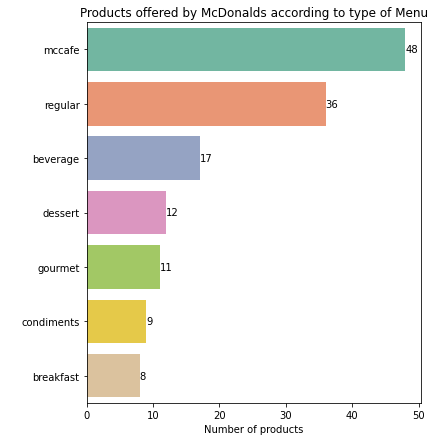

In [6]:
plt.figure(figsize=(6,7))
ax=sns.countplot(data=mcdonalds,y='menu',orient='v',
              order=mcdonalds['menu'].value_counts().index,
                palette='Set2')
abs_values = mcdonalds['menu'].value_counts(ascending=False).values #Store the counts first
ax.bar_label(container=ax.containers[0], labels=abs_values) #Apply the labels
plt.title('Products offered by McDonalds according to type of Menu')
plt.xlabel('Number of products')
plt.ylabel(' ')
plt.show()

##### *b. Calories distribution per menu type*

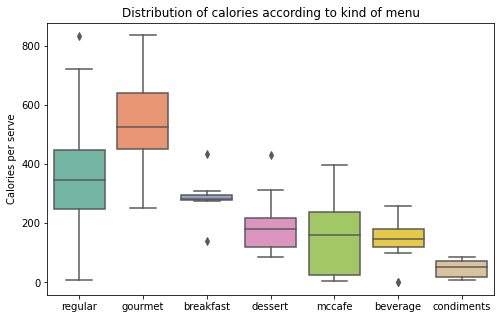

In [7]:
menu_order=['regular','gourmet','breakfast','dessert','mccafe','beverage','condiments']
plt.figure(figsize=(8,5))
sns.boxplot(data=mcdonalds,y='calories',x='menu',palette='Set2',order=menu_order)
plt.xlabel('')
plt.ylabel('Calories per serve')
plt.title('Distribution of calories according to kind of menu')
plt.show()

##### *c. Exploration of macronutrients for main dishes: gourmet, regular and breakfast'*

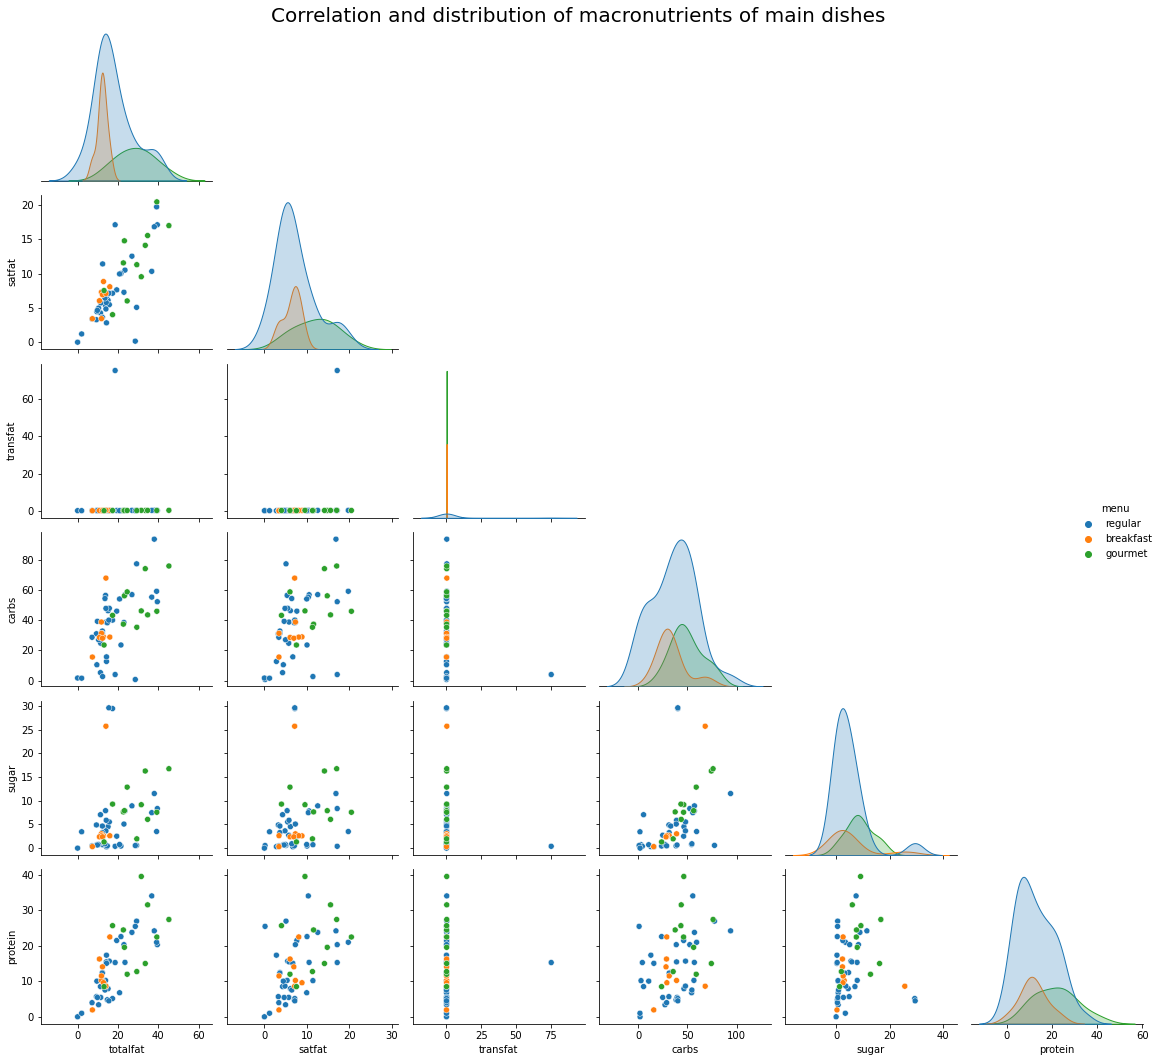

In [8]:
#Filtering main dishes and information
mcdonalds_mainfood=mcdonalds[mcdonalds['menu'].isin(['regular','breakfast','gourmet'])]
macronutrients=['totalfat','satfat','transfat','carbs','sugar','protein','menu']
#Plot
macros=sns.pairplot(mcdonalds_mainfood[macronutrients],corner=True,hue='menu')
macros.fig.suptitle('Correlation and distribution of macronutrients of main dishes',size=20)
plt.tight_layout()
plt.show()

##### *c. Top 5 products in terms of calories, added sugar, transfats and sodium'*

In [9]:
mcdonalds_mainfood=mcdonalds[mcdonalds['menu'].isin(['regular','breakfast','gourmet'])]
elements=['calories','totalfat','satfat','transfat','carbs','addedsugar','protein','menu']
mcdonalds[elements]

calories  totalfat  satfat  transfat  carbs  addedsugar  protein  \
0      402.00     13.83    5.34      0.16  56.54        4.49    10.24   
1      339.00     11.31    4.27      0.20   5.27        4.07     8.50   
2      652.00     39.45   17.12      0.18  52.33        5.27    20.29   
3      674.00     39.10   19.73      0.26  59.27        1.08    20.96   
4      512.00     23.45   10.51      0.17  56.96        4.76    15.30   
..        ...       ...     ...       ...    ...         ...      ...   
136     11.23     23.45    0.38      0.25   2.63        1.64     0.08   
137     86.40      0.00    0.00      0.40  21.60        5.34     0.00   
138     51.03      3.99    0.00      0.00   0.72        0.00     3.06   
139     45.08      1.00    2.89      0.01   7.55        0.00     1.47   
140     72.25      0.02    0.22      0.04  18.00        0.00     0.65   

           menu  
0       regular  
1       regular  
2       regular  
3       regular  
4       regular  
..          ...  
136  condiments  
137  condiments  
138  condiments  
139  condiments  
140  condiments  

[141 rows x 8 columns]

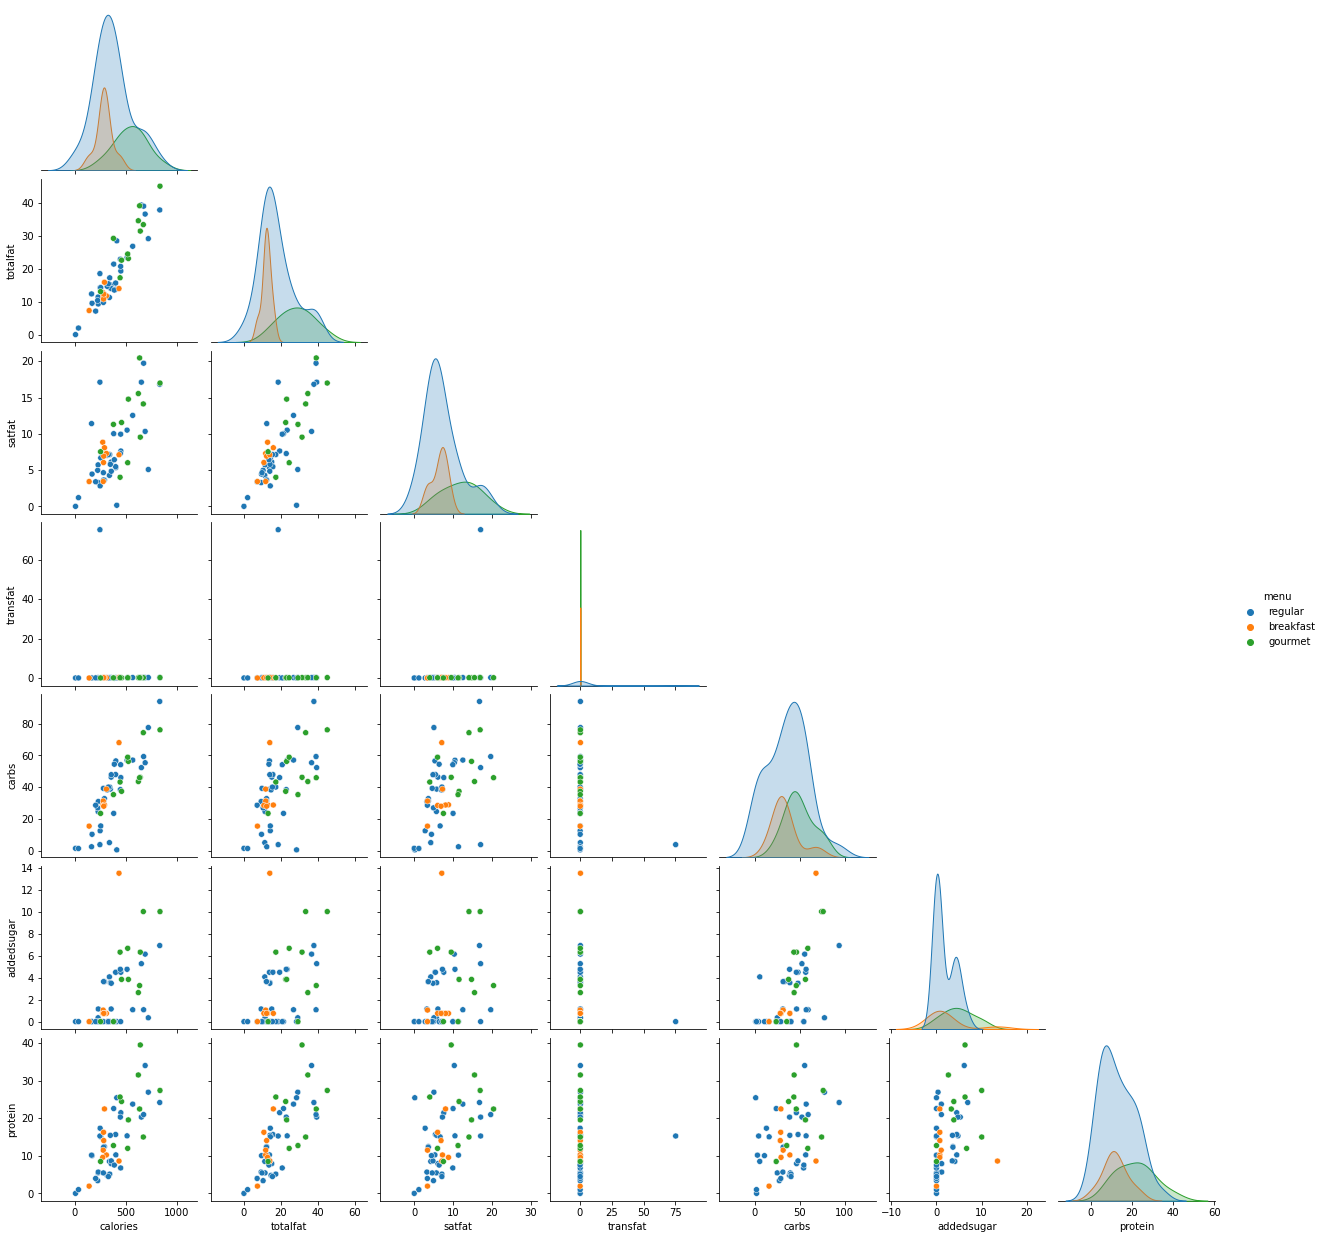

In [10]:
sns.pairplot(mcdonalds_mainfood[elements],corner=True,hue='menu')
plt.show()

In [11]:
mcdonalds_mainfood

item  servesize  calories  protein  \
0                               McVeggie Burger        168    402.00    10.24   
1                           McAloo Tikki Burger        146    339.00     8.50   
2                                       McSpicy        199    652.00    20.29   
3                             Spicy Paneer Wrap        250    674.00    20.96   
4                           American Veg Burger        177    512.00    15.30   
5                              Veg Maharaja Mac        306    832.00    24.17   
6                      Green Chilli Aloo Naan p        132    356.00     7.91   
7                                    Pizza Puff         87    228.00     5.45   
8                             Mc chicken Burger        173    400.00    15.66   
9                                        FILLET        136    348.00    15.44   
10                      Mc Spicy Chicken Burger        186    451.00    21.46   
11                           Spicy Chicken Wrap        257    567.00    23.74   
12                         Chicken Maharaja Mac        296    689.00    34.00   
13                      American Chicken Burger        165    446.00    20.29   
14                         Chicken Kebab Burger        138    357.00     8.64   
15                      Green Chilli Kebab naan        138    230.00     5.67   
16                         Mc Egg Masala Burger        126    290.00    12.45   
17                 Mc Egg Burger for Happy Meal        123    282.00    12.29   
18   Ghee Rice with Mc Spicy Fried Chicken 1 pc        325    720.00    26.91   
19                   McSpicy Fried Chicken 1 pc        115    248.00    17.33   
20                    4 piece Chicken McNuggets         64    169.00    10.03   
21                    6 piece Chicken McNuggets         96    254.00    15.04   
22                    9 piece Chicken McNuggets        144    381.00    22.56   
23                       2 piece Chicken Strips         58    164.00    10.17   
24                       3 piece Chicken Strips         87    246.00    15.26   
25                       5 piece Chicken Strips        145    411.00    25.43   
26                                Regular Fries         77    224.00     3.38   
27                                 Medium Fries        109    317.00     4.79   
28                                  Large Fries        154    449.00     6.76   
29                               Regular Wedges        114    204.00     3.97   
30                                Medium Wedges        156    280.00     5.44   
31                                 Large Wedges        216    387.00     7.53   
32                                    L1 Coffee        200      7.00     0.00   
33                          L1 Coffee with milk        205     36.00     1.00   
34                     Double Chocochips Muffin         80    342.00     5.13   
35                    Vanilla Chocochips Muffin         80    329.00     4.48   
36                                 Veg McMuffin        119    309.35    10.22   
37                       Double Cheese McMuffin        100    273.78     9.58   
38                           Spicy Egg McMuffin        123    278.27    11.49   
39                            Sausage Mc Muffin        112    281.44    16.25   
40                   Sausage Mc Muffin with egg        157    290.42    22.46   
41                                 Egg McMuffin        112    283.46    14.05   
42                    Hot Cake with maple syrup        142    432.98     8.60   
43                                   Hash Brown         64    140.29     1.93   
104              American Triple Cheese Chicken        195    457.94    24.43   
105                  American Triple Cheese Veg        207    524.69    19.54   
106                          Cheese Lava Burger        240    671.06    14.99   
107                  Chicken Cheese Lava Burger        307    834.36    27.37   
108     Chunky Chipotle American Burger Chicken        301    641.36    39

### III. Unsupervised Learning: Groups of regular foods

##### PCA

Considering the strong linear relationship between some variables (and the knowledge that some columns are just specification of others) we will reduce the dimmension of the dataset before doing the clustering. To do this we have to standarized, apply PCA and then evaluate the variance explained.

In [12]:
import warnings #To deal with warnings
warnings.filterwarnings("ignore") #To ignore warnings in this cell
##Filter data to consider only regular offers
mcdonalds_regulars=mcdonalds[mcdonalds['menu']=='regular']
##Standarize features
from sklearn.preprocessing import StandardScaler
info_nutri=['calories','protein','totalfat','satfat','transfat','cholestrol','carbs','sugar','addedsugar','sodium']
normalizer=StandardScaler() #Always important to create an object first (StandarScaler will center everything to 0)
mcdonalds_regulars[['calories_s','protein_s','totalfat_s','satfat_s',
                    'transfat_s','cholestrol_s','carbs_s','sugar_s',
                    'addedsugar_s','sodium_s']]=normalizer.fit_transform(mcdonalds_regulars[info_nutri]) #Notice the double brackets

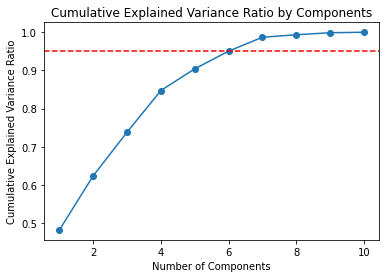

In [13]:
#Evaluate how many principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=len(info_nutri)) #At first we select as many components of features we consider (extreme scenario)
principalComponents = pca.fit_transform(mcdonalds_regulars[['calories_s','protein_s','totalfat_s','satfat_s',
                    'transfat_s','cholestrol_s','carbs_s','sugar_s',
                    'addedsugar_s','sodium_s']])
##To determine how many principal components we can evaluate the accumulative explained variance
pca.explained_variance_ratio_ #Initial object

cumulative_variance_ratios = np.cumsum(pca.explained_variance_ratio_) # Calculate cumulative explained variance ratios


components = range(1, len(pca.explained_variance_ratio_) + 1) # Create x-axis values for the plot (component indices) (+1 is to also include 10 - rember that range exclude the last term)

# Create the line plot
plt.plot(components,  #X axis
         cumulative_variance_ratios, #Y axis
         marker='o')

# Set labels and title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Components')
plt.axhline(y=0.95, color='red', linestyle='--', label='0.9 Explained Variance') #To follow the convention = 6 components

# Show the plot
plt.show()

In [14]:
#Now that we know that 6 is a good number to reduce, lets apply the code again but with  n_components=6
pca=PCA(n_components=6)
mcdonalds_regulars[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']]=pca.fit_transform(mcdonalds_regulars[['calories_s','protein_s','totalfat_s','satfat_s',
                    'transfat_s','cholestrol_s','carbs_s','sugar_s',
                    'addedsugar_s','sodium_s']])

When we use PCA we usually face a tradeoff, we get more efficient (or less redundant) features but we loose interpretability. That is, we cannot clearly identify anymore what is the meaning of each component. **How each component is made of? Here is a propossal to try to identify this and reduce the impact of the method in the interpretability**.

In [15]:
# Get the loadings or coefficients for each principal component
standarized_variables=['calories_s','protein_s','totalfat_s','satfat_s','transfat_s','cholestrol_s','carbs_s','sugar_s','addedsugar_s','sodium_s']
component_loadings = pca.components_ #Here we will get the contribution of each original variable to each component. For example, the contribution of calories_s to the first component is 4.424...
first_component_loadings = component_loadings[0] #To have a better visualization we can print the contribution of each variable to the component. To do that for the first (and most important) principal component, we should create a scope for the first component (first element in the previous list)
# Assuming your original variable names are stored in a list called 'variable_names'
for variable, loading in zip(standarized_variables, first_component_loadings):
    print(f"Variable: {variable}, Loading: {loading}") #Zip just paired the elements (usually use when both list are of the same length)

Variable: calories_s, Loading: 0.4424464506798053
Variable: protein_s, Loading: 0.38558681022229413
Variable: totalfat_s, Loading: 0.4267766291010599
Variable: satfat_s, Loading: 0.30401739729163474
Variable: transfat_s, Loading: -0.009995795022772168
Variable: cholestrol_s, Loading: 0.11488621357243567
Variable: carbs_s, Loading: 0.3461380704964601
Variable: sugar_s, Loading: 0.09452828141984236
Variable: addedsugar_s, Loading: 0.28994346847498786
Variable: sodium_s, Loading: 0.39355552127614707


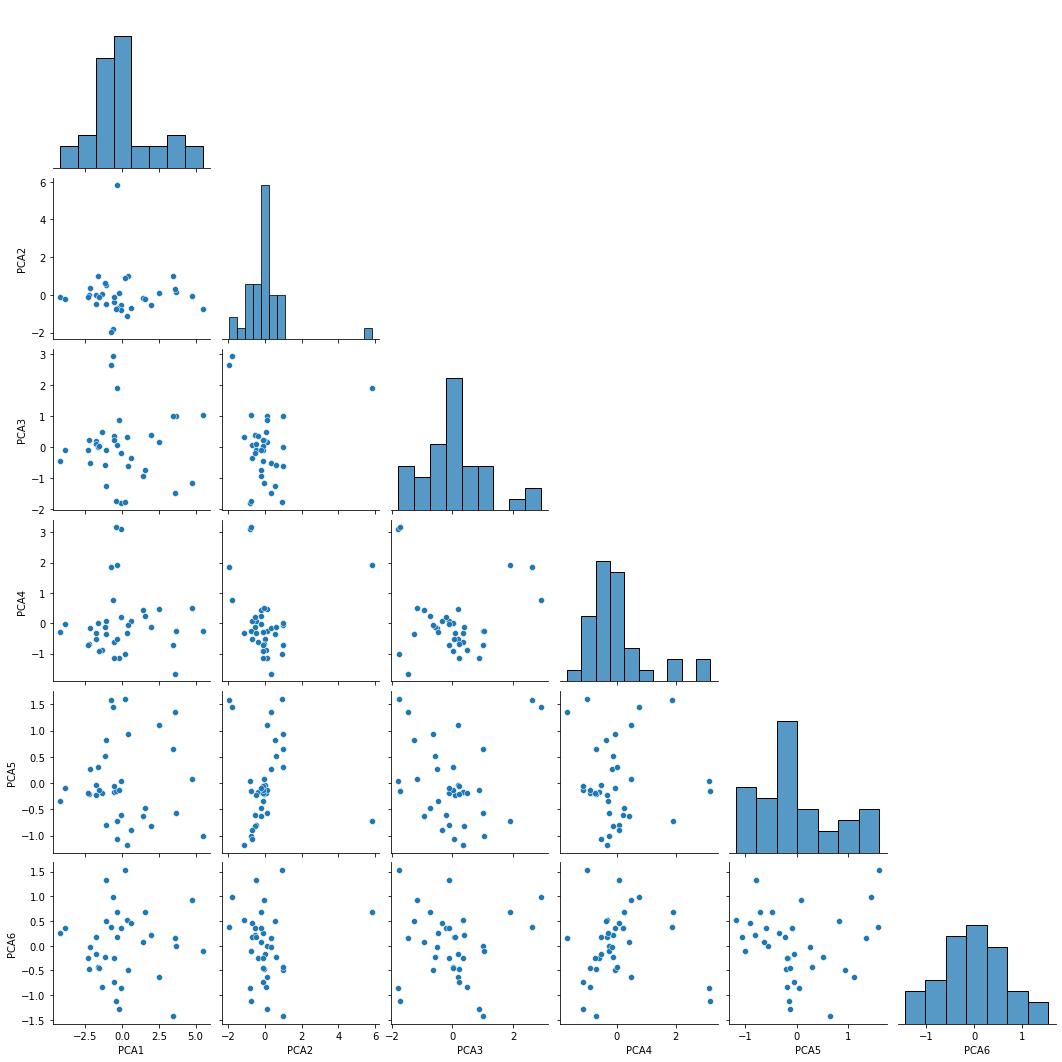

In [16]:
#Now lets clean the dataset and play with the new features
mcdonalds_regulars_reduced=mcdonalds_regulars.loc[:,['item','PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']]
#As expected, there is no clear linear relationship of the new variables
sns.pairplot(data=mcdonalds_regulars_reduced,corner=True)

In [17]:
#Set index as the labels of the items
mcdonalds_regulars_reduced=mcdonalds_regulars_reduced.set_index('item')

#### A. Hierachical Clustering

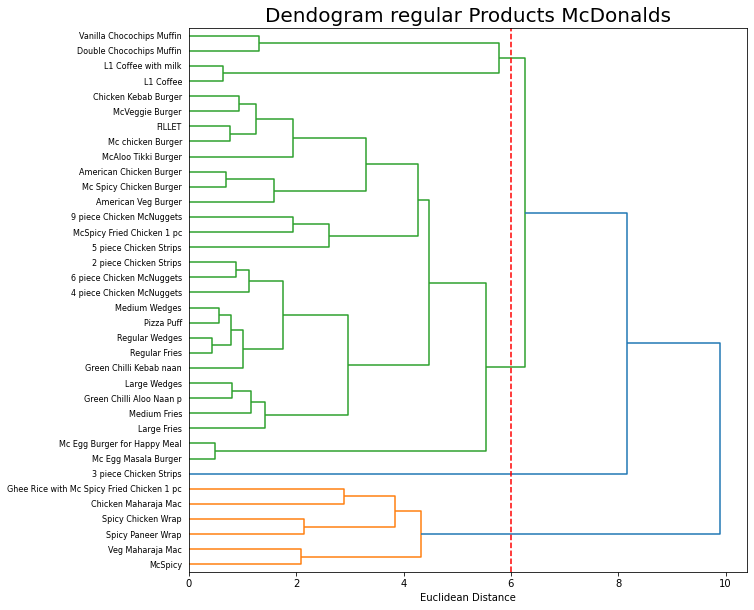

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']], #The variables considered to apply the clustering
                       method='complete', #The linkage form: most distant pair (as we know there are many other options including simple, average(centroids), etc)
                       metric='euclidean') #The way distance is calculated (check Manhattan)
plt.figure(figsize=(10,10))
dendrogram(linkage_data,orientation='right',labels=mcdonalds_regulars_reduced.index,show_contracted=True)
plt.xlabel('Euclidean Distance')
plt.title('Dendogram regular Products McDonalds',size=20)
plt.axvline(6,linestyle='--',color='red') #The cutoff is made based on our visual criteria
plt.show()

In [19]:
#The dendogram suggest that we can group into 4 groups if we make the cutoff point in euclidean distance=6
#Lets confirm how similar are the two items that were grouped at the beginning (medium wedges and pizza puff). Lets evaluate this in the original datas to get an easier interpretation
mcdonalds[mcdonalds['item'].isin(['Medium Wedges','Pizza Puff'])] #Indeed, they are very similar in almost all columns

item  servesize  calories  protein  totalfat  satfat  transfat  \
7      Pizza Puff         87     228.0     5.45     11.44    5.72      0.09   
30  Medium Wedges        156     280.0     5.44      9.79    4.64      0.18   

    cholestrol  carbs  sugar  addedsugar  sodium     menu  
7         5.17  24.79   2.73        0.35  390.74  regular  
30        1.33  39.33   0.66        0.00  487.76  regular

In [20]:
#Lets explore the product 3 piece Chicken Strips since it is very different from the rest
mcdonalds[mcdonalds['item']=='3 piece Chicken Strips'] #It seems that is very different because of the amount of transfat and cholesterol and sodium
#His data is probably wrong since it does not match with the website information https://www.mcdonalds.com/gb/en-gb/product/chicken-selects-3-pieces.html

item  servesize  calories  protein  totalfat  satfat  \
24  3 piece Chicken Strips         87     246.0    15.26     18.57   17.12   

    transfat  cholestrol  carbs  sugar  addedsugar  sodium     menu  
24     75.26       45.15   4.02   0.39         0.0  715.83  regular

In [21]:
#Lets apply the clustering one more time after droping that case
mcdonalds_regulars_reduced=mcdonalds_regulars_reduced[mcdonalds_regulars_reduced.index!='3 piece Chicken Strips'] #From reduced dataset
mcdonalds=mcdonalds[mcdonalds['item']!='3 piece Chicken Strips'] #From general dataset

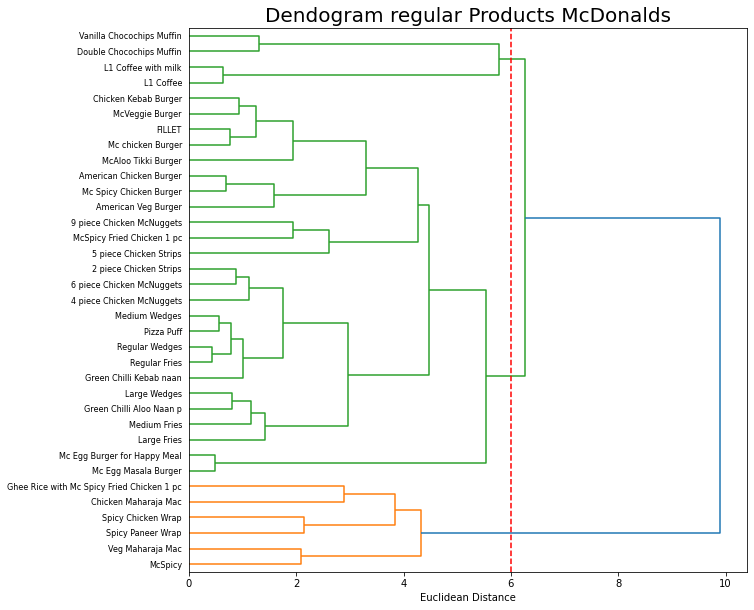

In [22]:
linkage_data = linkage(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']], #The variables considered to apply the clustering
                       method='complete', #The linkage form: most distant pair (as we know there are many other options including simple, average(centroids), etc)
                       metric='euclidean') #The way distance is calculated (check Manhattan)
plt.figure(figsize=(10,10))
dendrogram(linkage_data,orientation='right',labels=mcdonalds_regulars_reduced.index,show_contracted=True)
plt.xlabel('Euclidean Distance')
plt.title('Dendogram regular Products McDonalds',size=20)
plt.axvline(6,linestyle='--',color='red') #The cutoff is made based on our visual criteria
plt.show()

Now it is more clear to interpret that the first group corresponds to soft sweet drinks and bakeries, the second group to regular heavy meals and the third group to healthier food more based on chicken.

In [23]:
#Now lets save the clustering so far
from scipy.cluster.hierarchy import fcluster
assignments = fcluster(linkage(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']], 
                               method='complete',
                              metric='euclidean'),
                       6, #Euclidean distance point where we want to make the cut off
                       'distance') #Specification of distance
mcdonalds_regulars_reduced['cluster_hierachical']=assignments
mcdonalds_regulars_reduced #Now each case is labeled

PCA1      PCA2      PCA3  \
item                                                                       
McVeggie Burger                             0.310621 -1.110230  0.333668   
McAloo Tikki Burger                        -1.107298 -0.454924 -0.111259   
McSpicy                                     3.675235  0.140496  1.009516   
Spicy Paneer Wrap                           3.458560  1.005718  1.012822   
American Veg Burger                         1.947032 -0.550475  0.393294   
Veg Maharaja Mac                            5.516998 -0.750626  1.032337   
Green Chilli Aloo Naan p                   -0.535824 -0.371563  0.364043   
Pizza Puff                                 -1.779333  0.008979  0.199031   
Mc chicken Burger                           0.598531 -0.704069 -0.357354   
FILLET                                     -0.032335 -0.523192 -0.204545   
Mc Spicy Chicken Burger                     1.435460 -0.183282 -0.932277   
Spicy Chicken Wrap                          2.520552  0.111799  0.174793   
Chicken Maharaja Mac                        4.752572 -0.038003 -1.160677   
American Chicken Burger                     1.576306 -0.217336 -0.738573   
Chicken Kebab Burger                       -0.352160 -0.691181  0.048887   
Green Chilli Kebab naan                    -1.759167 -0.491680  0.090391   
Mc Egg Masala Burger                       -0.036676 -0.784387 -1.801874   
Mc Egg Burger for Happy Meal               -0.394609 -0.754059 -1.729810   
Ghee Rice with Mc Spicy Fried Chicken 1 pc  3.624468  0.324238 -1.479788   
McSpicy Fried Chicken 1 pc                 -1.060796  0.548119 -1.266135   
4 piece Chicken McNuggets                  -2.189548  0.354935 -0.500630   
6 piece Chicken McNuggets                  -1.161663  0.627377 -0.578108   
9 piece Chicken McNuggets                   0.391370  0.977153 -0.627519   
2 piece Chicken Strips                     -1.598165  1.008591  0.004077   
5 piece Chicken Strips                      0.189556  0.912814 -1.771986   
Regular Fries                              -2.217455 -0.012886  0.231279   
Medium Fries                               -1.374580  0.058109  0.474852   
Large Fries                                -0.176867  0.106733  0.877612   
Regular Wedges                             -2.301880 -0.097333 -0.111591   
Medium Wedges                              -1.575395 -0.100243  0.026368   
Large Wedges                               -0.541852 -0.118238  0.218249   
L1 Coffee                                  -4.222445 -0.111218 -0.466765   
L1 Coffee with milk                        -3.865823 -0.216639 -0.104459   
Double Chocochips Muffin                   -0.629263 -1.788671  2.930059   
Vanilla Chocochips Muffin                  -0.749955 -1.945858  2.632267   

                                                PCA4      PCA5      PCA6  \
item                                                                       
McVeggie Burger                            -0.318690 -1.182009  0.521700   
McAloo Tikki Burger                         0.066738 -0.789902  1.321622   
McSpicy                                    -0.265957 -0.561965 -0.012502   
Spicy Paneer Wrap                          -0.706547  0.647270 -1.432798   
American Veg Burger                        -0.133247 -0.812195  0.219285   
Veg Maharaja Mac                           -0.245221 -1.001138 -0.102643   
Green Chilli Aloo Naan p                   -0.609513 -0.170748 -0.249914   
Pizza Puff                                 -0.519545 -0.044586 -0.163750   
Mc chicken Burger                           0.076808 -0.899378  0.469502   
FILLET                                      0.213483 -0.603206  0.362966   
Mc Spicy Chicken Burger                     0.424274 -0.634012  0.076260   
Spicy Chicken Wrap                          0.475915  1.111755 -0.641912   
Chicken Maharaja Mac                        0.488281  0.082122  0.924716   
American Chicken Burger                     0.245098 -0.479233  0.681806   
Chicken Kebab Burge

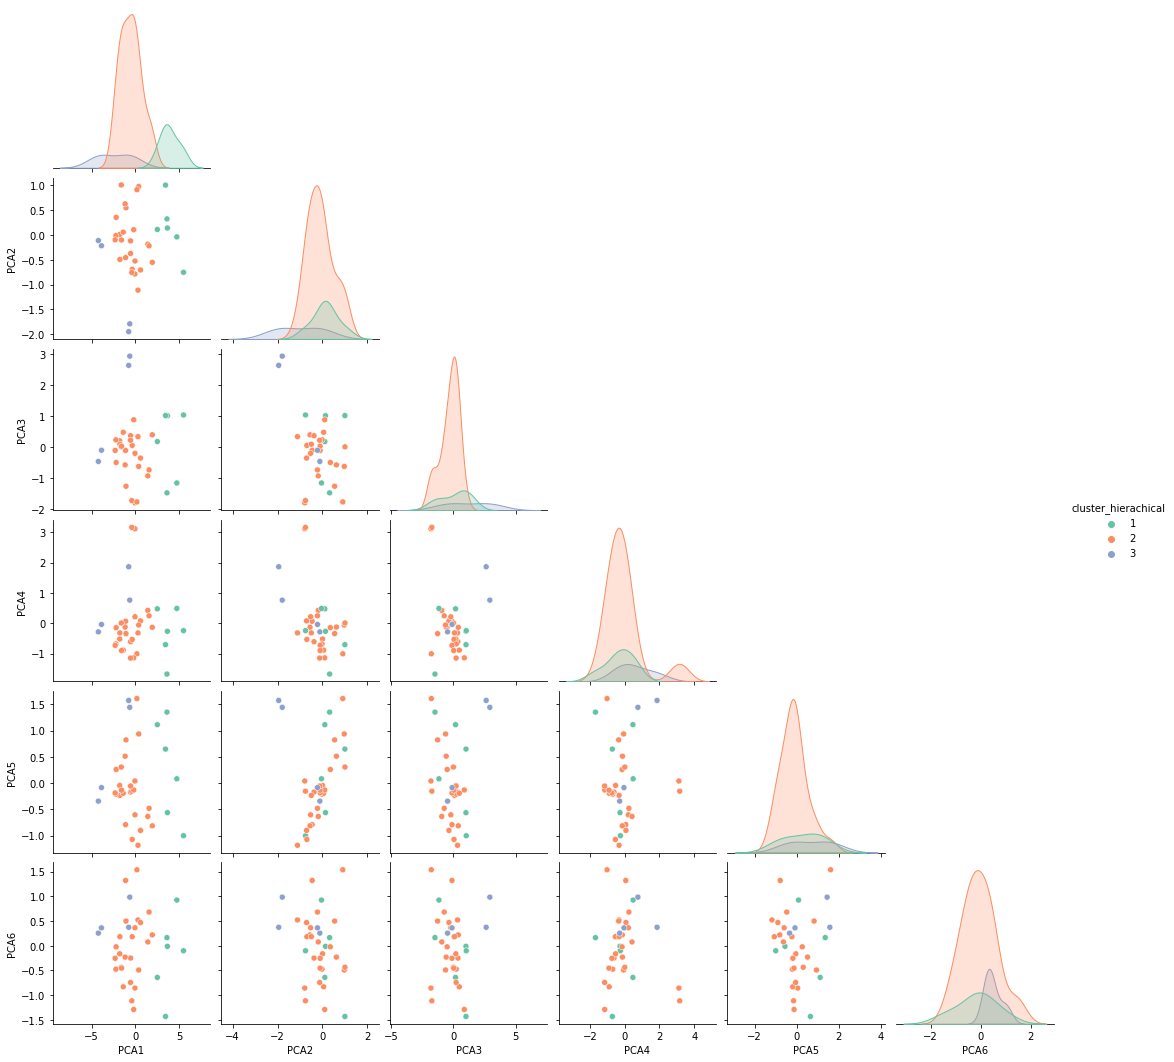

In [24]:
#To have a quick evaluation of this kind of clustering we can plot again using colors
sns.pairplot(mcdonalds_regulars_reduced,corner=True,hue='cluster_hierachical',palette='Set2')
plt.show()

In [25]:
#Evaluation of this kind of clustering
from sklearn.metrics import silhouette_score 
print('Sillohuette score: ', silhouette_score(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']], #Inputs
                                     mcdonalds_regulars_reduced['cluster_hierachical'])) #Grouping variable
hclustering_score=silhouette_score(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']], 
                                   mcdonalds_regulars_reduced['cluster_hierachical']) #Save the result for final comparison
#REFRESH OF SILOUETTE COEFFICIENT
# Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

# 1: Means clusters are well apart from each other and clearly distinguished.

# 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

# -1: Means clusters are assigned in the wrong way.

Sillohuette score:  0.30475627464936694


#### B. K means

In [26]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3) #Creation of instance (3 is arbitrary right now)
mcdonalds_regulars_reduced['cluster_kmeans']=km.fit_predict(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']])
mcdonalds_regulars_reduced #Now we have another way of clustering

PCA1      PCA2      PCA3  \
item                                                                       
McVeggie Burger                             0.310621 -1.110230  0.333668   
McAloo Tikki Burger                        -1.107298 -0.454924 -0.111259   
McSpicy                                     3.675235  0.140496  1.009516   
Spicy Paneer Wrap                           3.458560  1.005718  1.012822   
American Veg Burger                         1.947032 -0.550475  0.393294   
Veg Maharaja Mac                            5.516998 -0.750626  1.032337   
Green Chilli Aloo Naan p                   -0.535824 -0.371563  0.364043   
Pizza Puff                                 -1.779333  0.008979  0.199031   
Mc chicken Burger                           0.598531 -0.704069 -0.357354   
FILLET                                     -0.032335 -0.523192 -0.204545   
Mc Spicy Chicken Burger                     1.435460 -0.183282 -0.932277   
Spicy Chicken Wrap                          2.520552  0.111799  0.174793   
Chicken Maharaja Mac                        4.752572 -0.038003 -1.160677   
American Chicken Burger                     1.576306 -0.217336 -0.738573   
Chicken Kebab Burger                       -0.352160 -0.691181  0.048887   
Green Chilli Kebab naan                    -1.759167 -0.491680  0.090391   
Mc Egg Masala Burger                       -0.036676 -0.784387 -1.801874   
Mc Egg Burger for Happy Meal               -0.394609 -0.754059 -1.729810   
Ghee Rice with Mc Spicy Fried Chicken 1 pc  3.624468  0.324238 -1.479788   
McSpicy Fried Chicken 1 pc                 -1.060796  0.548119 -1.266135   
4 piece Chicken McNuggets                  -2.189548  0.354935 -0.500630   
6 piece Chicken McNuggets                  -1.161663  0.627377 -0.578108   
9 piece Chicken McNuggets                   0.391370  0.977153 -0.627519   
2 piece Chicken Strips                     -1.598165  1.008591  0.004077   
5 piece Chicken Strips                      0.189556  0.912814 -1.771986   
Regular Fries                              -2.217455 -0.012886  0.231279   
Medium Fries                               -1.374580  0.058109  0.474852   
Large Fries                                -0.176867  0.106733  0.877612   
Regular Wedges                             -2.301880 -0.097333 -0.111591   
Medium Wedges                              -1.575395 -0.100243  0.026368   
Large Wedges                               -0.541852 -0.118238  0.218249   
L1 Coffee                                  -4.222445 -0.111218 -0.466765   
L1 Coffee with milk                        -3.865823 -0.216639 -0.104459   
Double Chocochips Muffin                   -0.629263 -1.788671  2.930059   
Vanilla Chocochips Muffin                  -0.749955 -1.945858  2.632267   

                                                PCA4      PCA5      PCA6  \
item                                                                       
McVeggie Burger                            -0.318690 -1.182009  0.521700   
McAloo Tikki Burger                         0.066738 -0.789902  1.321622   
McSpicy                                    -0.265957 -0.561965 -0.012502   
Spicy Paneer Wrap                          -0.706547  0.647270 -1.432798   
American Veg Burger                        -0.133247 -0.812195  0.219285   
Veg Maharaja Mac                           -0.245221 -1.001138 -0.102643   
Green Chilli Aloo Naan p                   -0.609513 -0.170748 -0.249914   
Pizza Puff                                 -0.519545 -0.044586 -0.163750   
Mc chicken Burger                           0.076808 -0.899378  0.469502   
FILLET                                      0.213483 -0.603206  0.362966   
Mc Spicy Chicken Burger                     0.424274 -0.634012  0.076260   
Spicy Chicken Wrap                          0.475915  1.111755 -0.641912   
Chicken Maharaja Mac                        0.488281  0.082122  0.924716   
American Chicken Burger                     0.245098 -0.479233  0.681806   
Chicken Kebab Burge

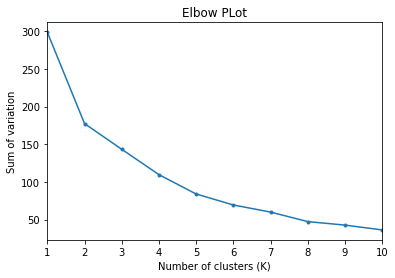

In [27]:
#However, maybe 3 is not the optimal value for K. Lets try different K's and decide based on internal variation of clusters
k_range = range(1,11) #Range of K's that we want to try
sse=[] #list in which we are going to save results
for k in k_range:
    km=KMeans(n_clusters=k,random_state=4) #Instances that would be updated with new K in each iteration
    km.fit(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']]) #Fit the model
    sse.append(km.inertia_) #This is the sum of internal variation of the clusters for each iteration 
#Now the list sse contains the sum of internal variation for each iteration. To have a better picture of where to do the cut off, we should create the elbow plot
#Plot the elbow
plt.plot(k_range,sse,marker='o',markersize=3)
plt.xlim(1,10)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of variation')
plt.title('Elbow PLot')
plt.show() #Hard to say but probably 4 is the last meaningful reduction in the sum of internal variation

In [28]:
#Now that we have choosen the ideal K, lets do the clusterin again. Something to notice is that the score changes sliglhy everytime because the initial possition is set randomly. To avoid that we can set a seed (Random state)
km=KMeans(n_clusters=4,random_state=3)
mcdonalds_regulars_reduced['cluster_kmeans']=km.fit_predict(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']])
#And now evaluate and save based on the Sillohuete score
kmclustering_score=silhouette_score(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']],
                mcdonalds_regulars_reduced['cluster_kmeans'])
print(kmclustering_score)

0.337378810717884


#### C. Kernal K Means Clustering

Extension of regular K means clustering used when clusters do not have linear boundaries (cluster are not spherical). Kenels allow us to project data in higher dimmensions to explore different ways to separate them into clusters

In [29]:
from tslearn.clustering import KernelKMeans #The package is not available in sckitlearn yet
#Create the instance
kernel_km = KernelKMeans(n_clusters=3, #Initial number of clusters (arbitrary )
                      kernel="gak", #Kind of transformation (projection to a greater space)
                      kernel_params={"sigma": "auto"}, 
                      n_init=20, #Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.Is iterarion with the specified number of k's
                      random_state=1) #Fix initital point

In [30]:
#Apply the instance
mcdonalds_regulars_reduced['cluster_kkmeans']=kernel_km.fit_predict(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']]) #Remember that is fit_predict NOT fit_transform
mcdonalds_regulars_reduced 

PCA1      PCA2      PCA3  \
item                                                                       
McVeggie Burger                             0.310621 -1.110230  0.333668   
McAloo Tikki Burger                        -1.107298 -0.454924 -0.111259   
McSpicy                                     3.675235  0.140496  1.009516   
Spicy Paneer Wrap                           3.458560  1.005718  1.012822   
American Veg Burger                         1.947032 -0.550475  0.393294   
Veg Maharaja Mac                            5.516998 -0.750626  1.032337   
Green Chilli Aloo Naan p                   -0.535824 -0.371563  0.364043   
Pizza Puff                                 -1.779333  0.008979  0.199031   
Mc chicken Burger                           0.598531 -0.704069 -0.357354   
FILLET                                     -0.032335 -0.523192 -0.204545   
Mc Spicy Chicken Burger                     1.435460 -0.183282 -0.932277   
Spicy Chicken Wrap                          2.520552  0.111799  0.174793   
Chicken Maharaja Mac                        4.752572 -0.038003 -1.160677   
American Chicken Burger                     1.576306 -0.217336 -0.738573   
Chicken Kebab Burger                       -0.352160 -0.691181  0.048887   
Green Chilli Kebab naan                    -1.759167 -0.491680  0.090391   
Mc Egg Masala Burger                       -0.036676 -0.784387 -1.801874   
Mc Egg Burger for Happy Meal               -0.394609 -0.754059 -1.729810   
Ghee Rice with Mc Spicy Fried Chicken 1 pc  3.624468  0.324238 -1.479788   
McSpicy Fried Chicken 1 pc                 -1.060796  0.548119 -1.266135   
4 piece Chicken McNuggets                  -2.189548  0.354935 -0.500630   
6 piece Chicken McNuggets                  -1.161663  0.627377 -0.578108   
9 piece Chicken McNuggets                   0.391370  0.977153 -0.627519   
2 piece Chicken Strips                     -1.598165  1.008591  0.004077   
5 piece Chicken Strips                      0.189556  0.912814 -1.771986   
Regular Fries                              -2.217455 -0.012886  0.231279   
Medium Fries                               -1.374580  0.058109  0.474852   
Large Fries                                -0.176867  0.106733  0.877612   
Regular Wedges                             -2.301880 -0.097333 -0.111591   
Medium Wedges                              -1.575395 -0.100243  0.026368   
Large Wedges                               -0.541852 -0.118238  0.218249   
L1 Coffee                                  -4.222445 -0.111218 -0.466765   
L1 Coffee with milk                        -3.865823 -0.216639 -0.104459   
Double Chocochips Muffin                   -0.629263 -1.788671  2.930059   
Vanilla Chocochips Muffin                  -0.749955 -1.945858  2.632267   

                                                PCA4      PCA5      PCA6  \
item                                                                       
McVeggie Burger                            -0.318690 -1.182009  0.521700   
McAloo Tikki Burger                         0.066738 -0.789902  1.321622   
McSpicy                                    -0.265957 -0.561965 -0.012502   
Spicy Paneer Wrap                          -0.706547  0.647270 -1.432798   
American Veg Burger                        -0.133247 -0.812195  0.219285   
Veg Maharaja Mac                           -0.245221 -1.001138 -0.102643   
Green Chilli Aloo Naan p                   -0.609513 -0.170748 -0.249914   
Pizza Puff                                 -0.519545 -0.044586 -0.163750   
Mc chicken Burger                           0.076808 -0.899378  0.469502   
FILLET                                      0.213483 -0.603206  0.362966   
Mc Spicy Chicken Burger                     0.424274 -0.634012  0.076260   
Spicy Chicken Wrap                          0.475915  1.111755 -0.641912   
Chicken Maharaja Mac                        0.488281  0.082122  0.924716   
American Chicken Burger                     0.245098 -0.479233  0.681806   
Chicken Kebab Burge

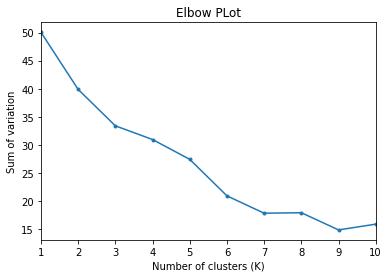

In [31]:
#Now lets use different possible K means
kk_range = range(1,11) #Range of K's that we want to try
sse=[] #list in which we are going to save results
for k in kk_range:
    kernel_km = KernelKMeans(n_clusters=k, #Initial number of clusters 
                      kernel="gak", 
                      kernel_params={"sigma": "auto"}, 
                      n_init=20,
                      random_state=1)    
    kernel_km.fit(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']]) #Fit the model
    sse.append(kernel_km.inertia_) #This is the sum of internal variation of the clusters for each iteration 
#Now the list sse contains the sum of internal variation for each iteration. To have a better picture of where to do the cut off, we should create the elbow plot
#Plot the elbow
plt.plot(k_range,sse,marker='o',markersize=3)
plt.xlim(1,10)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of variation')
plt.title('Elbow PLot')
plt.show() #Hard to say but probably 5 is the last meaningful reduction in the sum of internal variation

In [32]:
#Now that we have choosen the ideal K, lets do the clusterin again. Something to notice is that the score changes sliglhy everytime because the initial possition is set randomly. To avoid that we can set a seed (Random state)
kernel_km = KernelKMeans(n_clusters=5, #Initial number of clusters 
                      kernel="gak", 
                      kernel_params={"sigma": "auto"}, 
                      n_init=20,
                      random_state=1) 
mcdonalds_regulars_reduced['cluster_kkmeans']=kernel_km.fit_predict(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']])
#And now evaluate and save based on the Sillohuete score
kernel_kmclustering_score=silhouette_score(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']],
                mcdonalds_regulars_reduced['cluster_kkmeans'])
print(kernel_kmclustering_score)

0.2502422240999639


#### D. Expectation-Maximization Algorithm

The Expectation-Maximization Algorithm (EM) is an approach for maximum likelihood estimation in the presence of latent variables. Here the clustering is based on probabilities.

Here we start saying that each data follow a different normal distribution but those distributions are not clear yet and we need to estimate them. In other words, we have to revail the distribution of each point. 

It is based on Gaussian Mixture process: we start with a number that is equivalent to the **number of process (distributions)** that we think are behind our data. After that, we fit each data to those candidates distributions and see which fits better in terms of probability.

We are saying:

###### **This point is most likely to be in the distribution X1 (cluster 1), but also have N probability of being in the distribution X2 (cluster 2)**

In [33]:
from sklearn.mixture import GaussianMixture
EM=GaussianMixture(n_components=3,random_state=123) #Here n_components are as the initial K means but here they are candidates distribution
print(EM.fit_predict(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']])) #To print the classification if we consider 3 potential distributions
print(EM.predict_proba(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']])) #To see the actual probability of each case. Each case would have 3 probabilities, the final classification would be the higher one
#Just to know how to do it, we can save those results in the dataframe to explore each case better 
mcdonalds_regulars_reduced[['EM_C1','EM_C2','EM_C3']]=EM.predict_proba(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']])

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.91638590e-08 9.99999951e-01 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.98284363e-56 0.00000000e+00 1.00000000e+00]
 [4.77287257e-61 0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.54512796e-06

In [34]:
#Now we have three new columns
mcdonalds_regulars_reduced #We notice that the clustering is very clear. For example MCVeggie Burguer is clearly classify as part of the first cluster

PCA1      PCA2      PCA3  \
item                                                                       
McVeggie Burger                             0.310621 -1.110230  0.333668   
McAloo Tikki Burger                        -1.107298 -0.454924 -0.111259   
McSpicy                                     3.675235  0.140496  1.009516   
Spicy Paneer Wrap                           3.458560  1.005718  1.012822   
American Veg Burger                         1.947032 -0.550475  0.393294   
Veg Maharaja Mac                            5.516998 -0.750626  1.032337   
Green Chilli Aloo Naan p                   -0.535824 -0.371563  0.364043   
Pizza Puff                                 -1.779333  0.008979  0.199031   
Mc chicken Burger                           0.598531 -0.704069 -0.357354   
FILLET                                     -0.032335 -0.523192 -0.204545   
Mc Spicy Chicken Burger                     1.435460 -0.183282 -0.932277   
Spicy Chicken Wrap                          2.520552  0.111799  0.174793   
Chicken Maharaja Mac                        4.752572 -0.038003 -1.160677   
American Chicken Burger                     1.576306 -0.217336 -0.738573   
Chicken Kebab Burger                       -0.352160 -0.691181  0.048887   
Green Chilli Kebab naan                    -1.759167 -0.491680  0.090391   
Mc Egg Masala Burger                       -0.036676 -0.784387 -1.801874   
Mc Egg Burger for Happy Meal               -0.394609 -0.754059 -1.729810   
Ghee Rice with Mc Spicy Fried Chicken 1 pc  3.624468  0.324238 -1.479788   
McSpicy Fried Chicken 1 pc                 -1.060796  0.548119 -1.266135   
4 piece Chicken McNuggets                  -2.189548  0.354935 -0.500630   
6 piece Chicken McNuggets                  -1.161663  0.627377 -0.578108   
9 piece Chicken McNuggets                   0.391370  0.977153 -0.627519   
2 piece Chicken Strips                     -1.598165  1.008591  0.004077   
5 piece Chicken Strips                      0.189556  0.912814 -1.771986   
Regular Fries                              -2.217455 -0.012886  0.231279   
Medium Fries                               -1.374580  0.058109  0.474852   
Large Fries                                -0.176867  0.106733  0.877612   
Regular Wedges                             -2.301880 -0.097333 -0.111591   
Medium Wedges                              -1.575395 -0.100243  0.026368   
Large Wedges                               -0.541852 -0.118238  0.218249   
L1 Coffee                                  -4.222445 -0.111218 -0.466765   
L1 Coffee with milk                        -3.865823 -0.216639 -0.104459   
Double Chocochips Muffin                   -0.629263 -1.788671  2.930059   
Vanilla Chocochips Muffin                  -0.749955 -1.945858  2.632267   

                                                PCA4      PCA5      PCA6  \
item                                                                       
McVeggie Burger                            -0.318690 -1.182009  0.521700   
McAloo Tikki Burger                         0.066738 -0.789902  1.321622   
McSpicy                                    -0.265957 -0.561965 -0.012502   
Spicy Paneer Wrap                          -0.706547  0.647270 -1.432798   
American Veg Burger                        -0.133247 -0.812195  0.219285   
Veg Maharaja Mac                           -0.245221 -1.001138 -0.102643   
Green Chilli Aloo Naan p                   -0.609513 -0.170748 -0.249914   
Pizza Puff                                 -0.519545 -0.044586 -0.163750   
Mc chicken Burger                           0.076808 -0.899378  0.469502   
FILLET                                      0.213483 -0.603206  0.362966   
Mc Spicy Chicken Burger                     0.424274 -0.634012  0.076260   
Spicy Chicken Wrap                          0.475915  1.111755 -0.641912   
Chicken Maharaja Mac                        0.488281  0.082122  0.924716   
American Chicken Burger                     0.245098 -0.479233  0.681806   
Chicken Kebab Burge

In [35]:
#That was just an excerise, lets drop those probability columns to keep it similar
mcdonalds_regulars_reduced=mcdonalds_regulars_reduced.drop(['EM_C1','EM_C2','EM_C3'],axis=1)

In [36]:
EM.score(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']])

-1.8951021620102877

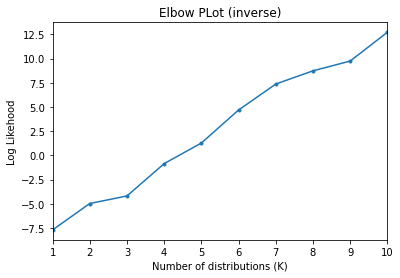

In [37]:
#Similarly to the previous process, lets try differen cluster (distributions) to see which one reduces significantly the inner variation of clusters
em_range = range(1,11) #Number of candidate distributions
log_like=[] #list in which we are going to save results
for k in em_range:
    em_model = GaussianMixture(n_components=k,random_state=1)   
    em_model.fit(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']]) #Fit the model
    log_like.append(em_model.score(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']])) #In this case, we will not check the inertia but the log likehood (higher log likehood, better fit)
#Now the list sse contains the sum of internal variation for each iteration. To have a better picture of where to do the cut off, we should create the elbow plot
#Plot the elbow
plt.plot(em_range,log_like,marker='o',markersize=3)
plt.xlim(1,10)
plt.xlabel('Number of distributions (K)')
plt.ylabel('Log Likehood')
plt.title('Elbow PLot (inverse)')
plt.show() #Hard to say but probably 3/5 is the last meaningful reduction in the sum of internal variation
#Probably 5 is the right number

In [38]:
#Now lets calculate the sillohuete score
em_model=GaussianMixture(n_components=5,random_state=1)#Instance with the best number of distributions found
mcdonalds_regulars_reduced['cluster_em']=em_model.fit_predict(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']])
em_clustering_score=silhouette_score(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']],
                mcdonalds_regulars_reduced['cluster_em'])
print(em_clustering_score)

0.3577622144040455


# Comparison

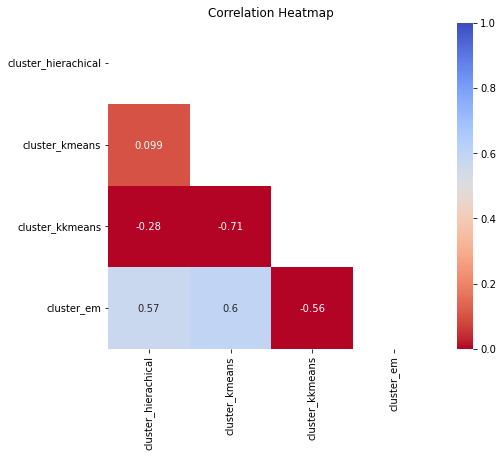

In [39]:
# Calculate similarity between clustering so far (First we need to rest 1 to hierachical clustering because is the only one that starts at 1)
mcdonalds_regulars_reduced['cluster_hierachical']=mcdonalds_regulars_reduced['cluster_hierachical']-1
mcdonalds_cols=mcdonalds_regulars_reduced[['cluster_hierachical','cluster_kmeans','cluster_kkmeans','cluster_em']]
correlation_matrix = mcdonalds_cols.corr()
# Create a mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm_r", square=True,mask=mask, vmin=0,vmax=1)

# Add labels and title
plt.xlabel("")
plt.ylabel("")
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

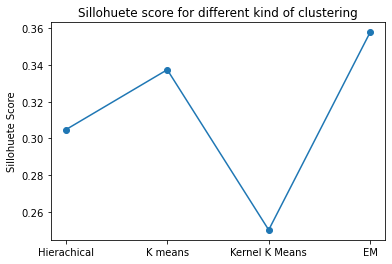

In [40]:
#Now the sillohuetes
x_labels = ['Hierachical', 'K means', 'Kernel K Means', 'EM']
sillohuetes=[hclustering_score,kmclustering_score,kernel_kmclustering_score,em_clustering_score]
plt.plot(range(4),sillohuetes,marker='o')
plt.ylabel('Sillohuete Score')
plt.title('Sillohuete score for different kind of clustering')
plt.xticks(range(4), x_labels) 
plt.show()

# Application using EM

**Due to the fact that EM made the better job clustering the cases, lets build a meal with the 5 categories**. Furthermore, we can use the probabilistic approach of EM to only consider those meal that were more clearly classify in the category. We can do this based of the result of sofmax classifier

In [41]:
#First, lets refit but not getting the hard classification but the probabilities
mcdonalds_regulars_reduced[['EM_C1','EM_C2','EM_C3','EM_C4','EM_C5']]=em_model.predict_proba(mcdonalds_regulars_reduced[['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']])
#The sum of probabilities is not always exactly 1 but this is due to floating rounding and is very slightly (1.0000002)
mcdonalds_regulars_reduced

PCA1      PCA2      PCA3  \
item                                                                       
McVeggie Burger                             0.310621 -1.110230  0.333668   
McAloo Tikki Burger                        -1.107298 -0.454924 -0.111259   
McSpicy                                     3.675235  0.140496  1.009516   
Spicy Paneer Wrap                           3.458560  1.005718  1.012822   
American Veg Burger                         1.947032 -0.550475  0.393294   
Veg Maharaja Mac                            5.516998 -0.750626  1.032337   
Green Chilli Aloo Naan p                   -0.535824 -0.371563  0.364043   
Pizza Puff                                 -1.779333  0.008979  0.199031   
Mc chicken Burger                           0.598531 -0.704069 -0.357354   
FILLET                                     -0.032335 -0.523192 -0.204545   
Mc Spicy Chicken Burger                     1.435460 -0.183282 -0.932277   
Spicy Chicken Wrap                          2.520552  0.111799  0.174793   
Chicken Maharaja Mac                        4.752572 -0.038003 -1.160677   
American Chicken Burger                     1.576306 -0.217336 -0.738573   
Chicken Kebab Burger                       -0.352160 -0.691181  0.048887   
Green Chilli Kebab naan                    -1.759167 -0.491680  0.090391   
Mc Egg Masala Burger                       -0.036676 -0.784387 -1.801874   
Mc Egg Burger for Happy Meal               -0.394609 -0.754059 -1.729810   
Ghee Rice with Mc Spicy Fried Chicken 1 pc  3.624468  0.324238 -1.479788   
McSpicy Fried Chicken 1 pc                 -1.060796  0.548119 -1.266135   
4 piece Chicken McNuggets                  -2.189548  0.354935 -0.500630   
6 piece Chicken McNuggets                  -1.161663  0.627377 -0.578108   
9 piece Chicken McNuggets                   0.391370  0.977153 -0.627519   
2 piece Chicken Strips                     -1.598165  1.008591  0.004077   
5 piece Chicken Strips                      0.189556  0.912814 -1.771986   
Regular Fries                              -2.217455 -0.012886  0.231279   
Medium Fries                               -1.374580  0.058109  0.474852   
Large Fries                                -0.176867  0.106733  0.877612   
Regular Wedges                             -2.301880 -0.097333 -0.111591   
Medium Wedges                              -1.575395 -0.100243  0.026368   
Large Wedges                               -0.541852 -0.118238  0.218249   
L1 Coffee                                  -4.222445 -0.111218 -0.466765   
L1 Coffee with milk                        -3.865823 -0.216639 -0.104459   
Double Chocochips Muffin                   -0.629263 -1.788671  2.930059   
Vanilla Chocochips Muffin                  -0.749955 -1.945858  2.632267   

                                                PCA4      PCA5      PCA6  \
item                                                                       
McVeggie Burger                            -0.318690 -1.182009  0.521700   
McAloo Tikki Burger                         0.066738 -0.789902  1.321622   
McSpicy                                    -0.265957 -0.561965 -0.012502   
Spicy Paneer Wrap                          -0.706547  0.647270 -1.432798   
American Veg Burger                        -0.133247 -0.812195  0.219285   
Veg Maharaja Mac                           -0.245221 -1.001138 -0.102643   
Green Chilli Aloo Naan p                   -0.609513 -0.170748 -0.249914   
Pizza Puff                                 -0.519545 -0.044586 -0.163750   
Mc chicken Burger                           0.076808 -0.899378  0.469502   
FILLET                                      0.213483 -0.603206  0.362966   
Mc Spicy Chicken Burger                     0.424274 -0.634012  0.076260   
Spicy Chicken Wrap                          0.475915  1.111755 -0.641912   
Chicken Maharaja Mac                        0.488281  0.082122  0.924716   
American Chicken Burger                     0.245098 -0.479233  0.681806   
Chicken Kebab Burge

In [42]:
#Now lets filter just cases with very high probability (0.9 or above) for each of the 5 categories
#First reset index
mcdonalds_regulars_reduced=mcdonalds_regulars_reduced.reset_index()

In [43]:
#Create a different dataframe for each cluster. Only considering clearly classifications (above 0.9)
clusters_em=['EM_C1','EM_C2','EM_C3','EM_C4','EM_C5']
groups_food=[]
for i in range(len(clusters_em)):
    a='group_'
    b=str(clusters_em[i])
    globals()[a+b]=mcdonalds_regulars_reduced.loc[mcdonalds_regulars_reduced[clusters_em[i]]>=0.9]
    globals()[a+b]=globals()[a+b][['item']]
    groups_food.append(globals()[a+b])

In [44]:
#Now lets do the match with the original dataframe to have a better interpretation of the similarity between the clearly classified items
for i in range(len(groups_food)):
    a='mcoriginal_'
    b=clusters_em[i]
    globals()[a+b]=pd.merge(mcdonalds, groups_food[i], on='item', how='inner')

### Group 1: Spicy or Vegan (More related to indian food)

Among the clearly classify items we found most of the indian dishes available in McDonalds. 

In [45]:
mcoriginal_EM_C1

item  servesize  calories  protein  \
0                                     McSpicy        199     652.0    20.29   
1                           Spicy Paneer Wrap        250     674.0    20.96   
2                            Veg Maharaja Mac        306     832.0    24.17   
3                          Spicy Chicken Wrap        257     567.0    23.74   
4                        Chicken Maharaja Mac        296     689.0    34.00   
5  Ghee Rice with Mc Spicy Fried Chicken 1 pc        325     720.0    26.91   

   totalfat  satfat  transfat  cholestrol  carbs  sugar  addedsugar   sodium  \
0     39.45   17.12      0.18       21.85  52.33   8.35        5.27  1074.58   
1     39.10   19.73      0.26       40.93  59.27   3.50        1.08  1087.46   
2     37.94   16.83      0.28       36.19  93.84  11.52        6.92  1529.22   
3     26.89   12.54      0.27       87.63  57.06   8.92        1.08  1152.38   
4     36.69   10.33      0.25       81.49  55.39   7.48        6.14  1854.71   
5     29.20    5.08      0.30       31.32  77.47   0.58        0.35  2399.49   

      menu  
0  regular  
1  regular  
2  regular  
3  regular  
4  regular  
5  regular

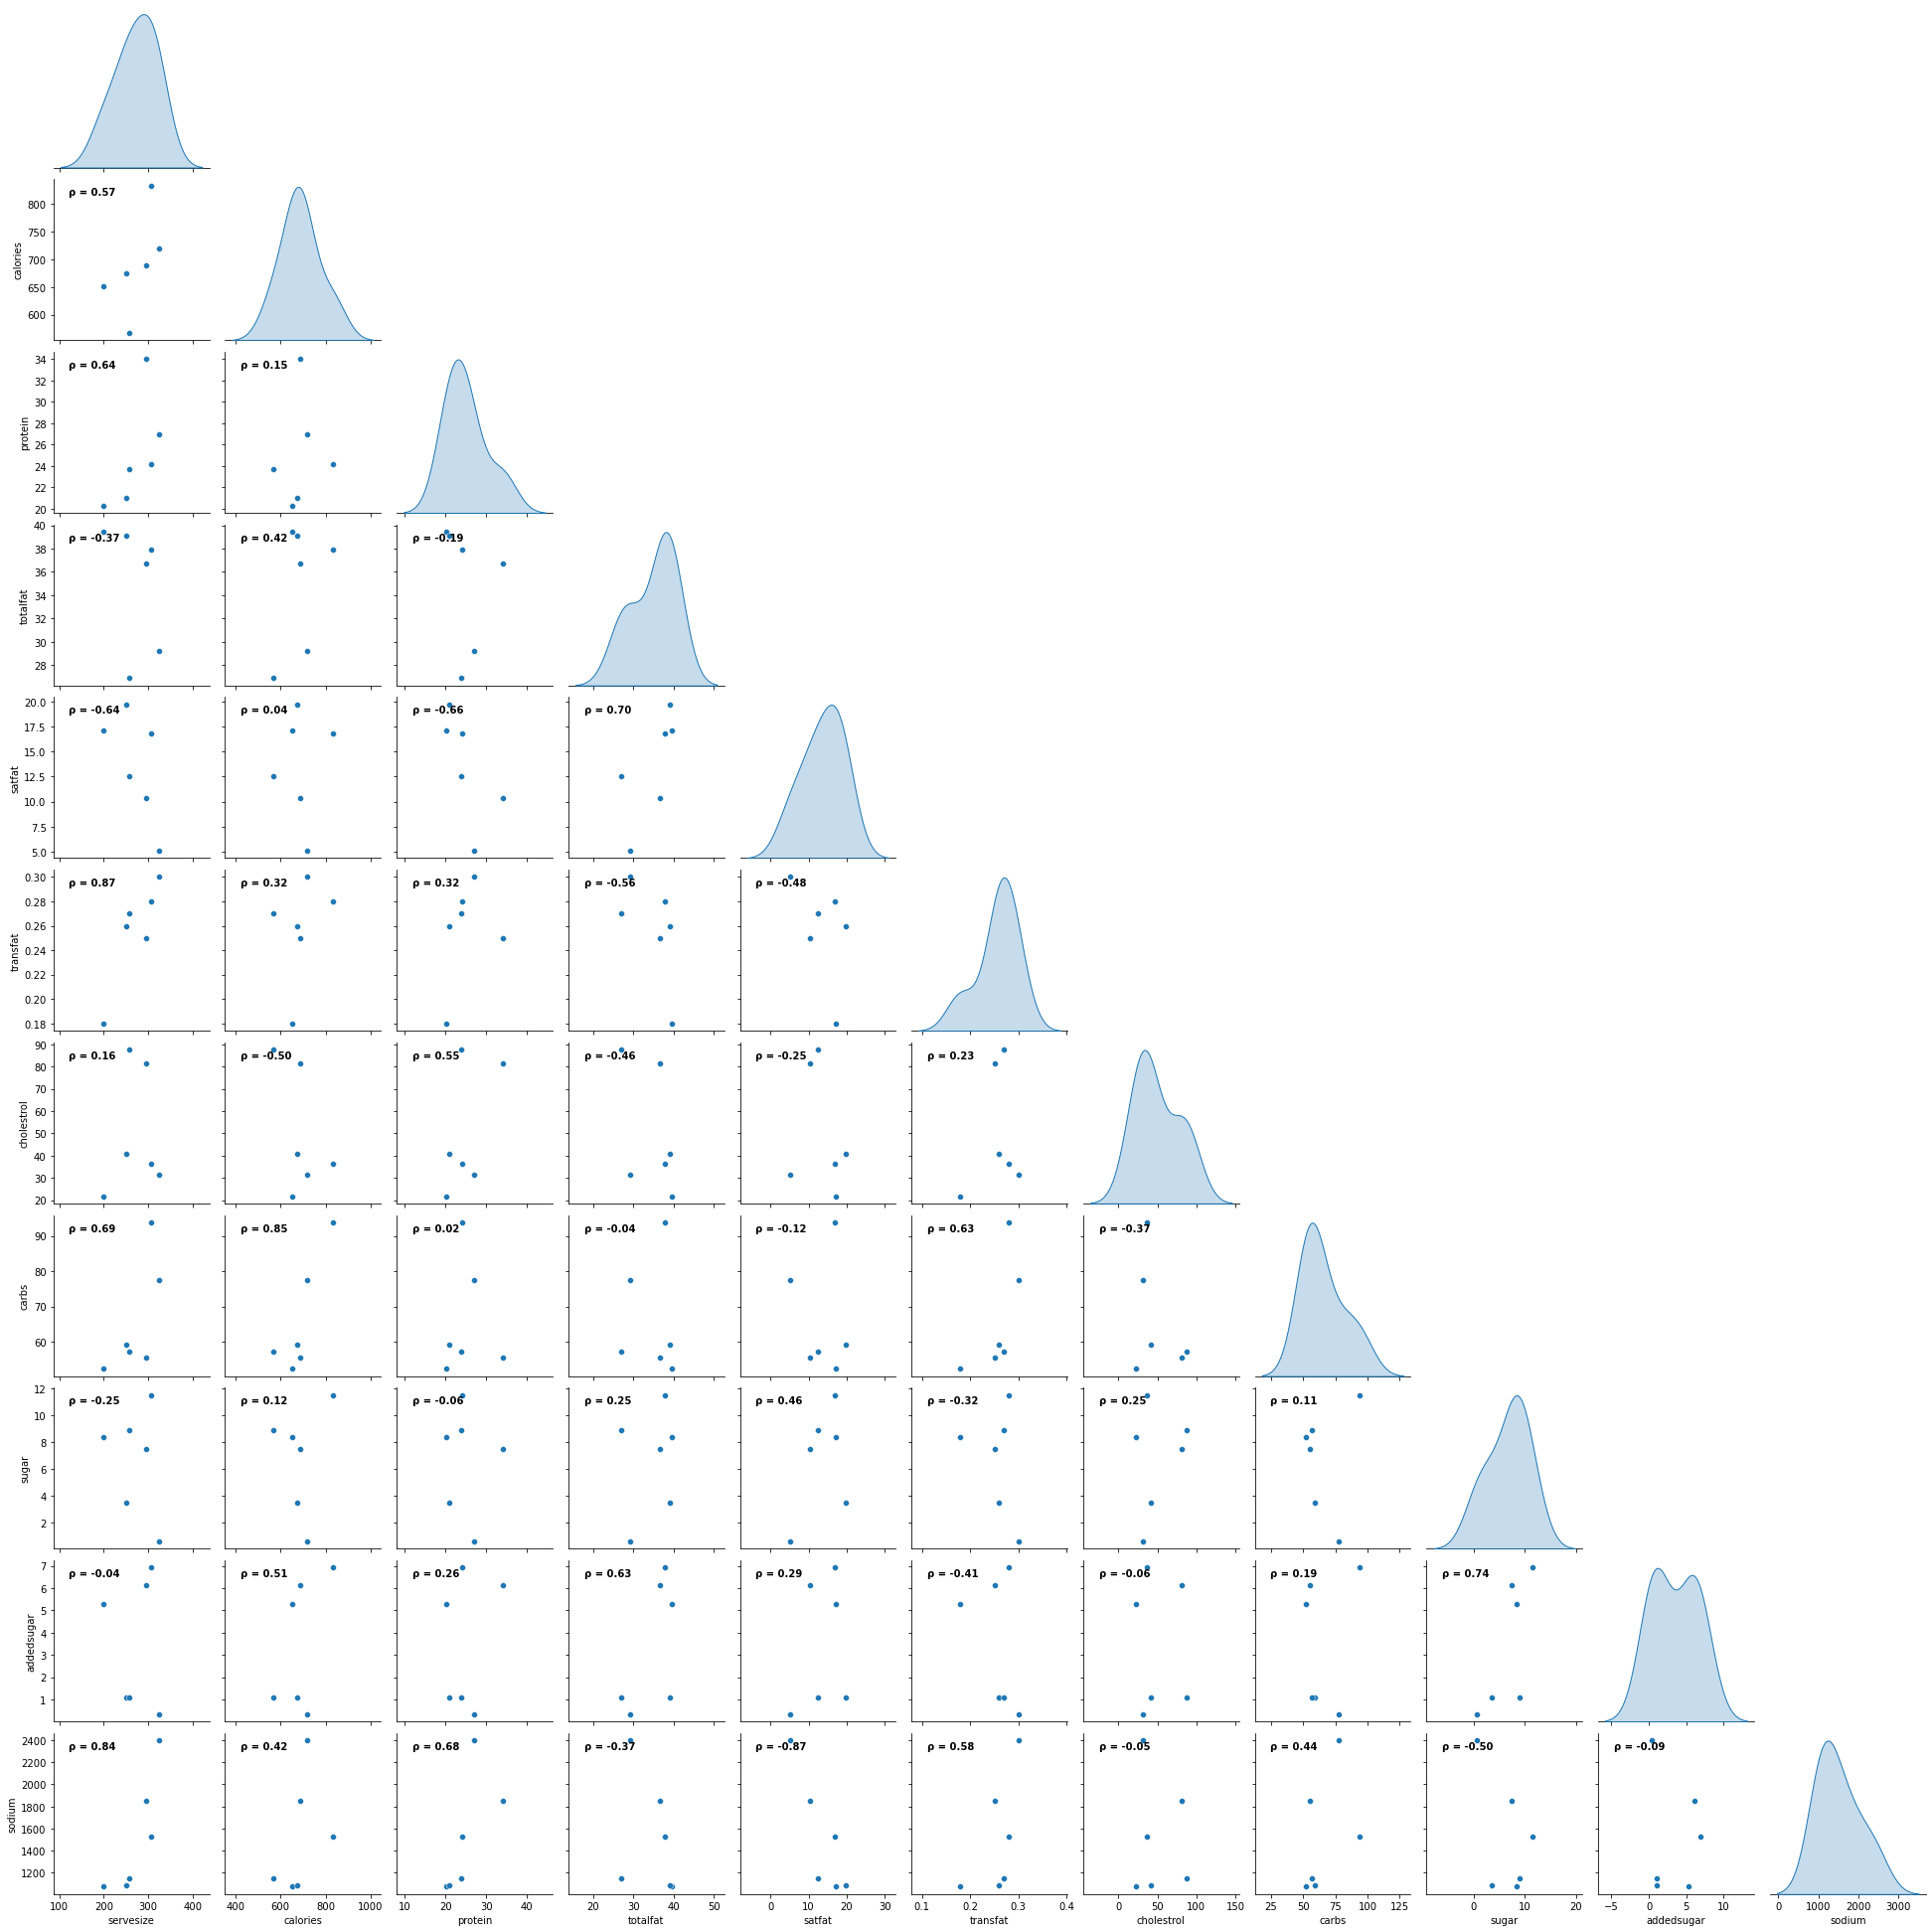

In [46]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

#Notice how compact are the density plots - that is a good sign of our classification :)
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes,weight='bold')

g1=sns.pairplot(mcoriginal_EM_C1,corner=True,palette='Set2',diag_kind='kde')
g1.map_lower(corrfunc)
plt.show()

### So based on the options we would get Spicy Chicken Wrap

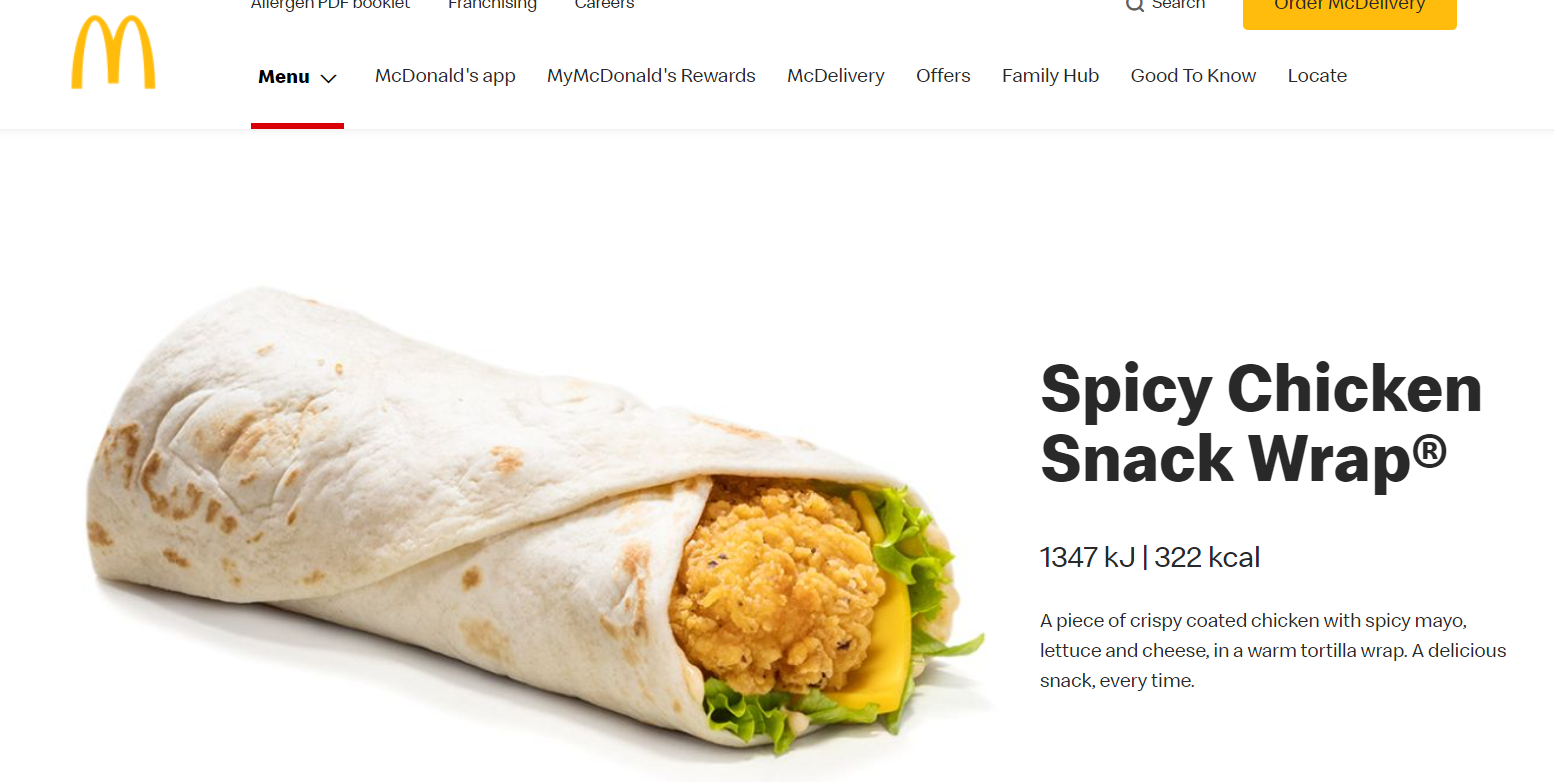

### Group 2: Spicy or Vegan (More related to indian food)

Here we found pretty much complements and, therefore, less caloric food per serving size (fires, mcnuggets, pizza puff, etc)

In [47]:
mcoriginal_EM_C2

item  servesize  calories  protein  totalfat  satfat  \
0         McAloo Tikki Burger        146     339.0     8.50     11.31    4.27   
1    Green Chilli Aloo Naan p        132     356.0     7.91     15.08    6.11   
2                  Pizza Puff         87     228.0     5.45     11.44    5.72   
3     Green Chilli Kebab naan        138     230.0     5.67      9.32    3.27   
4   4 piece Chicken McNuggets         64     169.0    10.03      9.54    4.45   
5   6 piece Chicken McNuggets         96     254.0    15.04     14.30    6.68   
6      2 piece Chicken Strips         58     164.0    10.17     12.38   11.41   
7               Regular Fries         77     224.0     3.38     10.39    4.97   
8                Medium Fries        109     317.0     4.79     14.70    7.04   
9                 Large Fries        154     449.0     6.76     20.77    9.95   
10             Regular Wedges        114     204.0     3.97      7.15    3.39   
11              Medium Wedges        156     280.0     5.44      9.79    4.64   
12               Large Wedges        216     387.0     7.53     13.55    6.43   
13                  L1 Coffee        200       7.0     0.00      0.00    0.00   
14        L1 Coffee with milk        205      36.0     1.00      2.00    1.20   

    transfat  cholestrol  carbs  sugar  addedsugar  sodium     menu  
0       0.20        1.47   5.27   7.05        4.07  545.34  regular  
1       0.24        9.45  46.36   4.53        1.15  579.60  regular  
2       0.09        5.17  24.79   2.73        0.35  390.74  regular  
3       0.19        8.74  31.06   4.89        1.15  410.78  regular  
4       0.10       24.66  10.50   0.72        0.00  313.25  regular  
5       0.14       36.99  15.74   0.29        0.00  469.87  regular  
6       0.09       30.10   2.68   0.72        0.00  477.22  regular  
7       0.11        0.77  27.08   0.77        0.00  153.15  regular  
8       0.15        1.09  38.34   0.48        0.00  216.79  regular  
9       0.10        1.54  54.16   0.77        0.00  306.29  regular  
10      0.13        0.97  28.74   0.48        0.00  356.44  regular  
11      0.18        1.33  39.33   0.66        0.00  487.76  regular  
12      0.00        1.84  54.46   0.92        0.00  675.35  regular  
13      0.08        0.00   1.70   0.00        0.00    0.00  regular  
14      0.08        6.00   1.60   3.45        0.00   14.00  regular

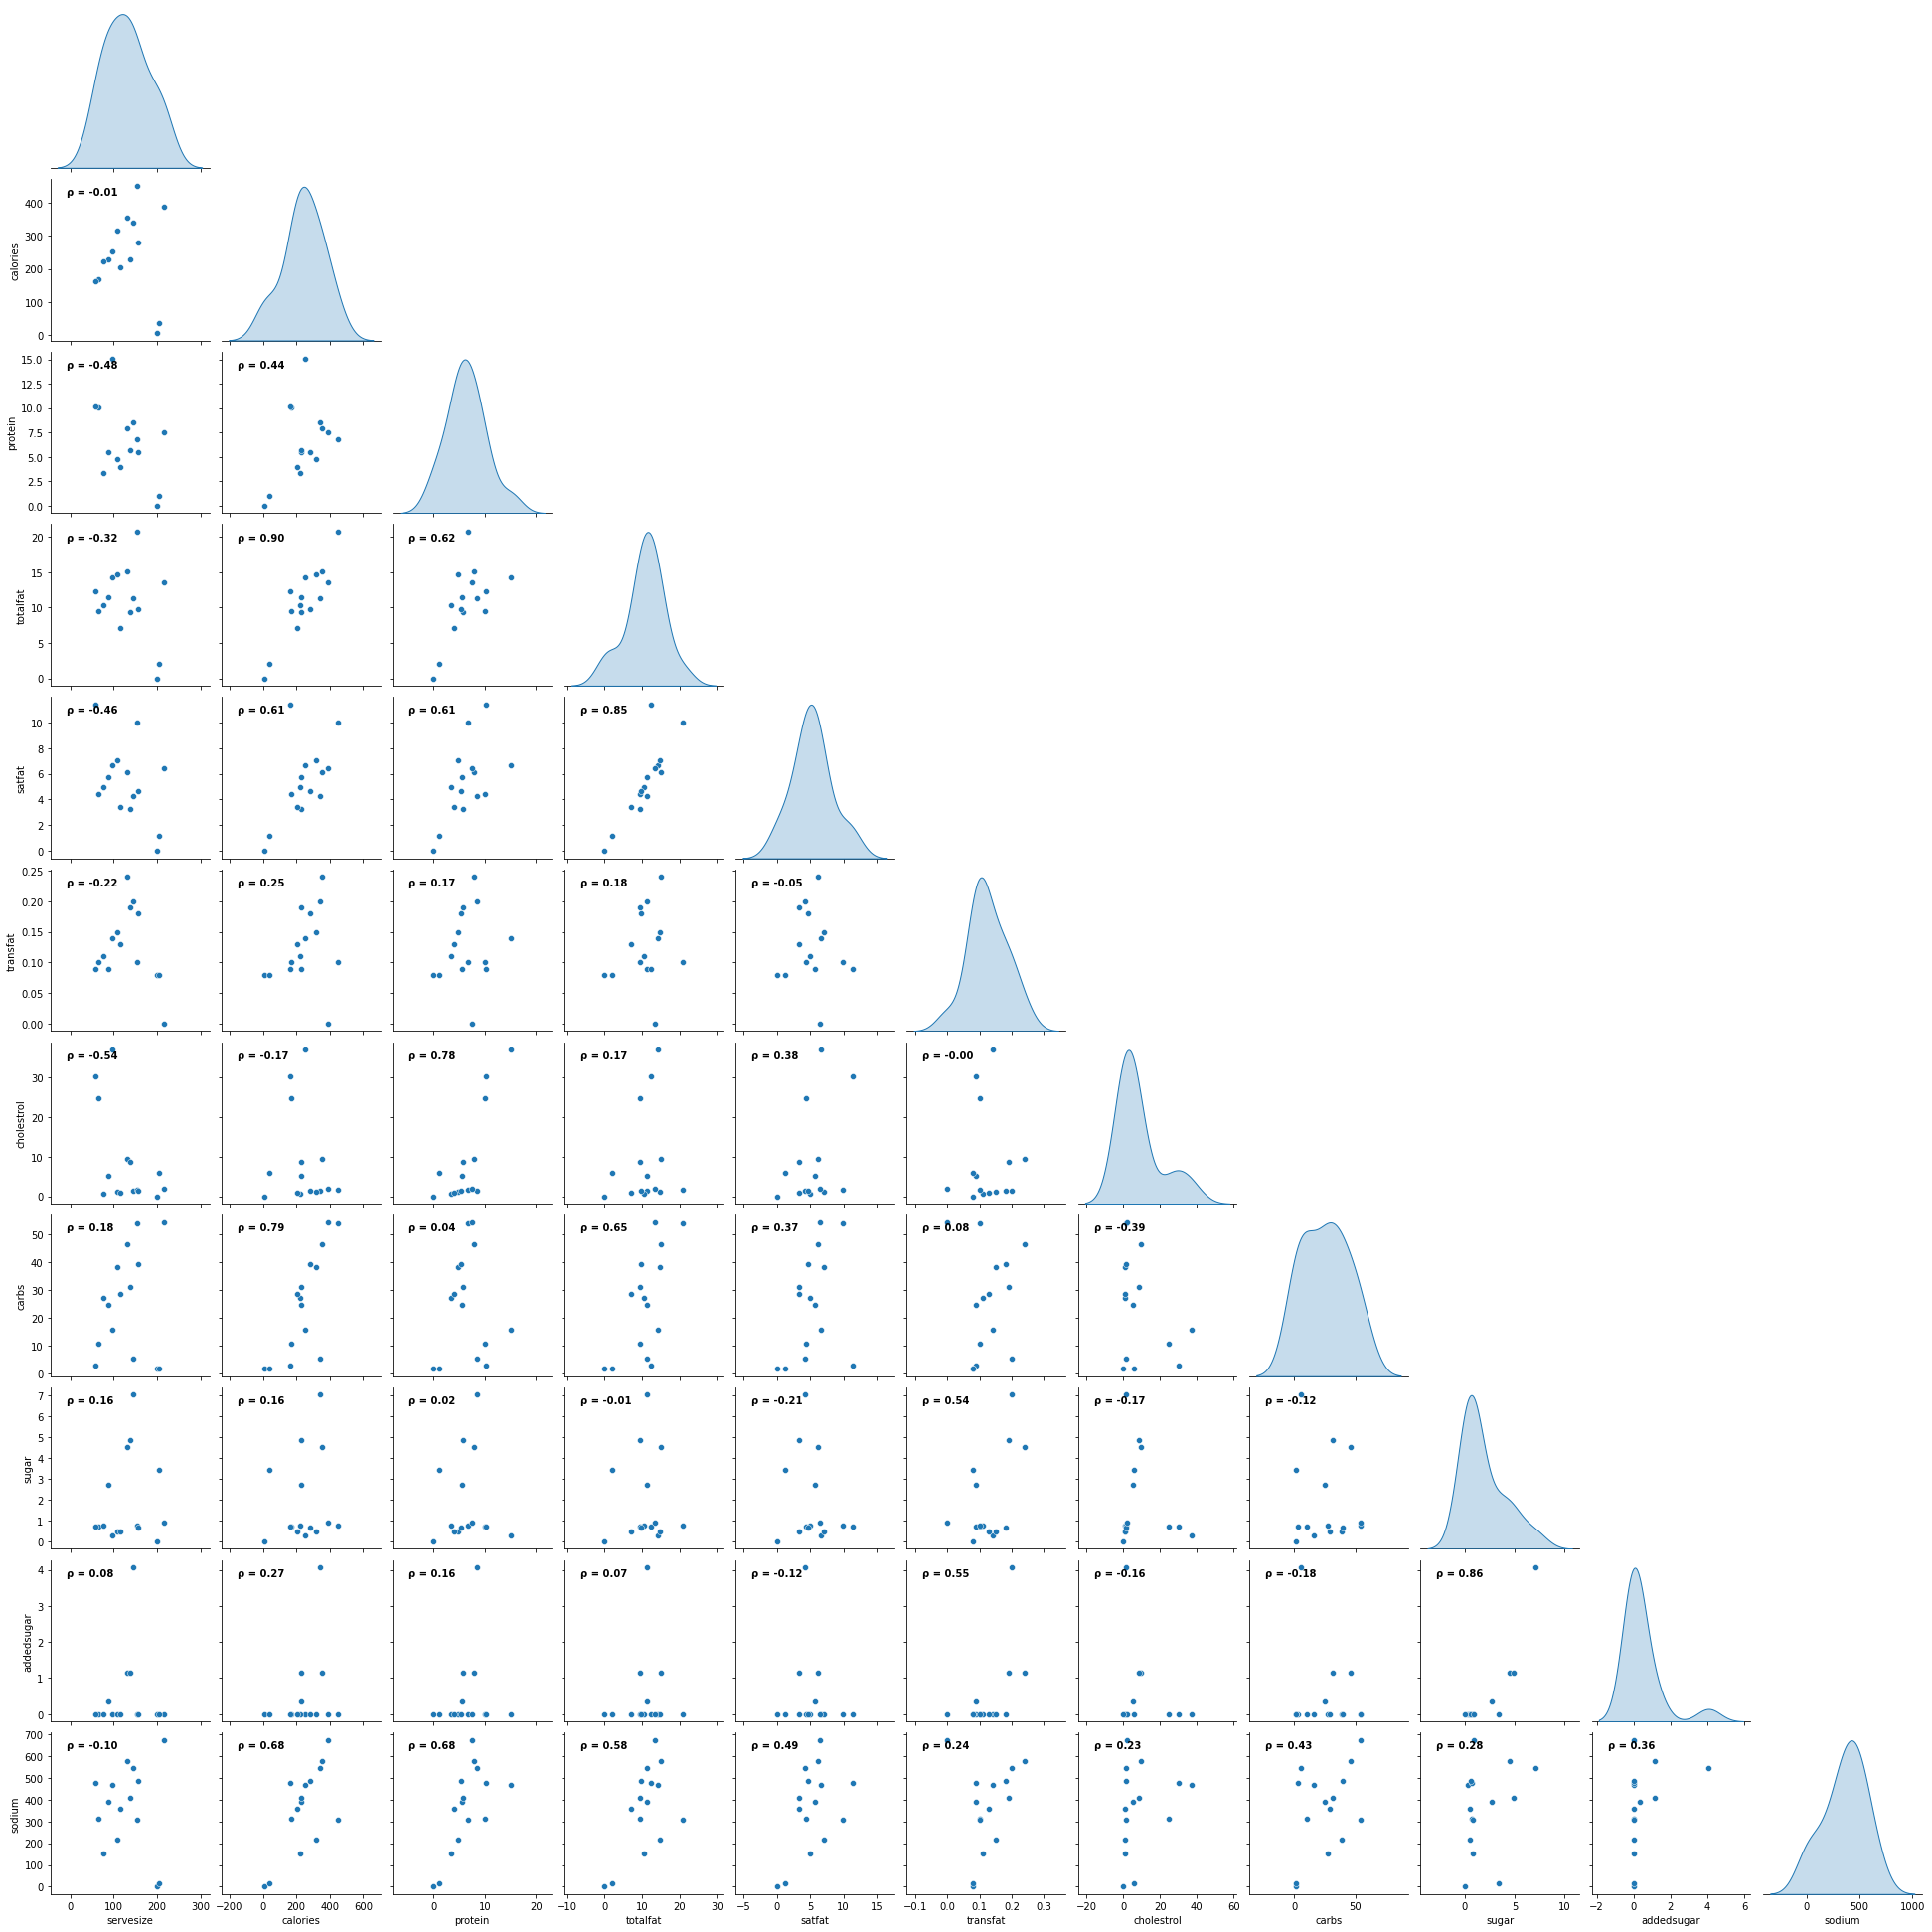

In [48]:
#Notice how compact are the density plots - that is a good sign of our classification :)
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes,weight='bold')

g1=sns.pairplot(mcoriginal_EM_C2,corner=True,palette='Set2',diag_kind='kde')
g1.map_lower(corrfunc)
plt.show()

### So based on the options we would get Medium Fries (classic :))

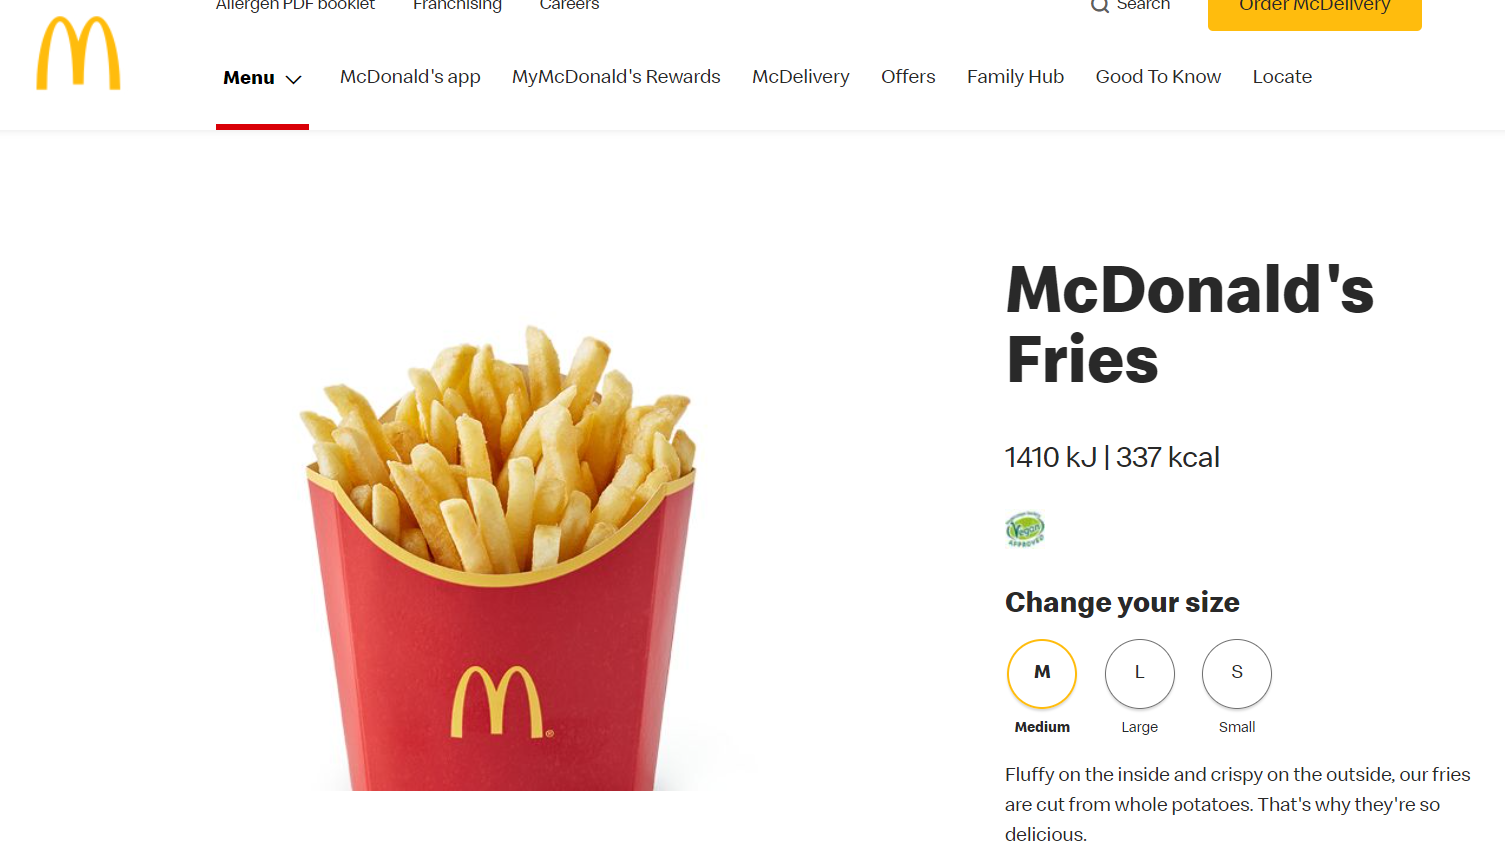

### Group 3:  Chicken based food 

Among the clearly classified one we found chicken based food. 

In [49]:
mcoriginal_EM_C3

item  servesize  calories  protein  totalfat  satfat  \
0             McVeggie Burger        168     402.0    10.24     13.83    5.34   
1         American Veg Burger        177     512.0    15.30     23.45   10.51   
2           Mc chicken Burger        173     400.0    15.66     15.70    5.47   
3                      FILLET        136     348.0    15.44     14.16    5.79   
4     Mc Spicy Chicken Burger        186     451.0    21.46     19.36    7.63   
5     American Chicken Burger        165     446.0    20.29     22.94    7.28   
6        Chicken Kebab Burger        138     357.0     8.64     14.02    4.84   
7  McSpicy Fried Chicken 1 pc        115     248.0    17.33     14.29    2.82   
8   9 piece Chicken McNuggets        144     381.0    22.56     21.46   10.02   
9      5 piece Chicken Strips        145     411.0    25.43     28.54    0.15   

   transfat  cholestrol  carbs  sugar  addedsugar    sodium     menu  
0      0.16        2.49  56.54   7.90        4.49   706.130  regular  
1      0.17       25.24  56.96   7.85        4.76  1051.240  regular  
2      0.16       31.17  47.98   5.53        4.49   766.330  regular  
3      0.21       32.83  38.85   5.88        3.54   530.540  regular  
4      0.18       66.04  46.08   2.52        4.49   928.520  regular  
5      0.15       47.63  38.54   5.08        4.76  1132.300  regular  
6      0.13        1.51  47.90   3.64        3.49   548.790  regular  
7      0.06       31.11  12.70   0.32        0.00   873.890  regular  
8      0.06       55.48  23.62   0.44        0.00   704.810  regular  
9      0.08        6.70   0.73   0.55        0.00  1193.052  regular

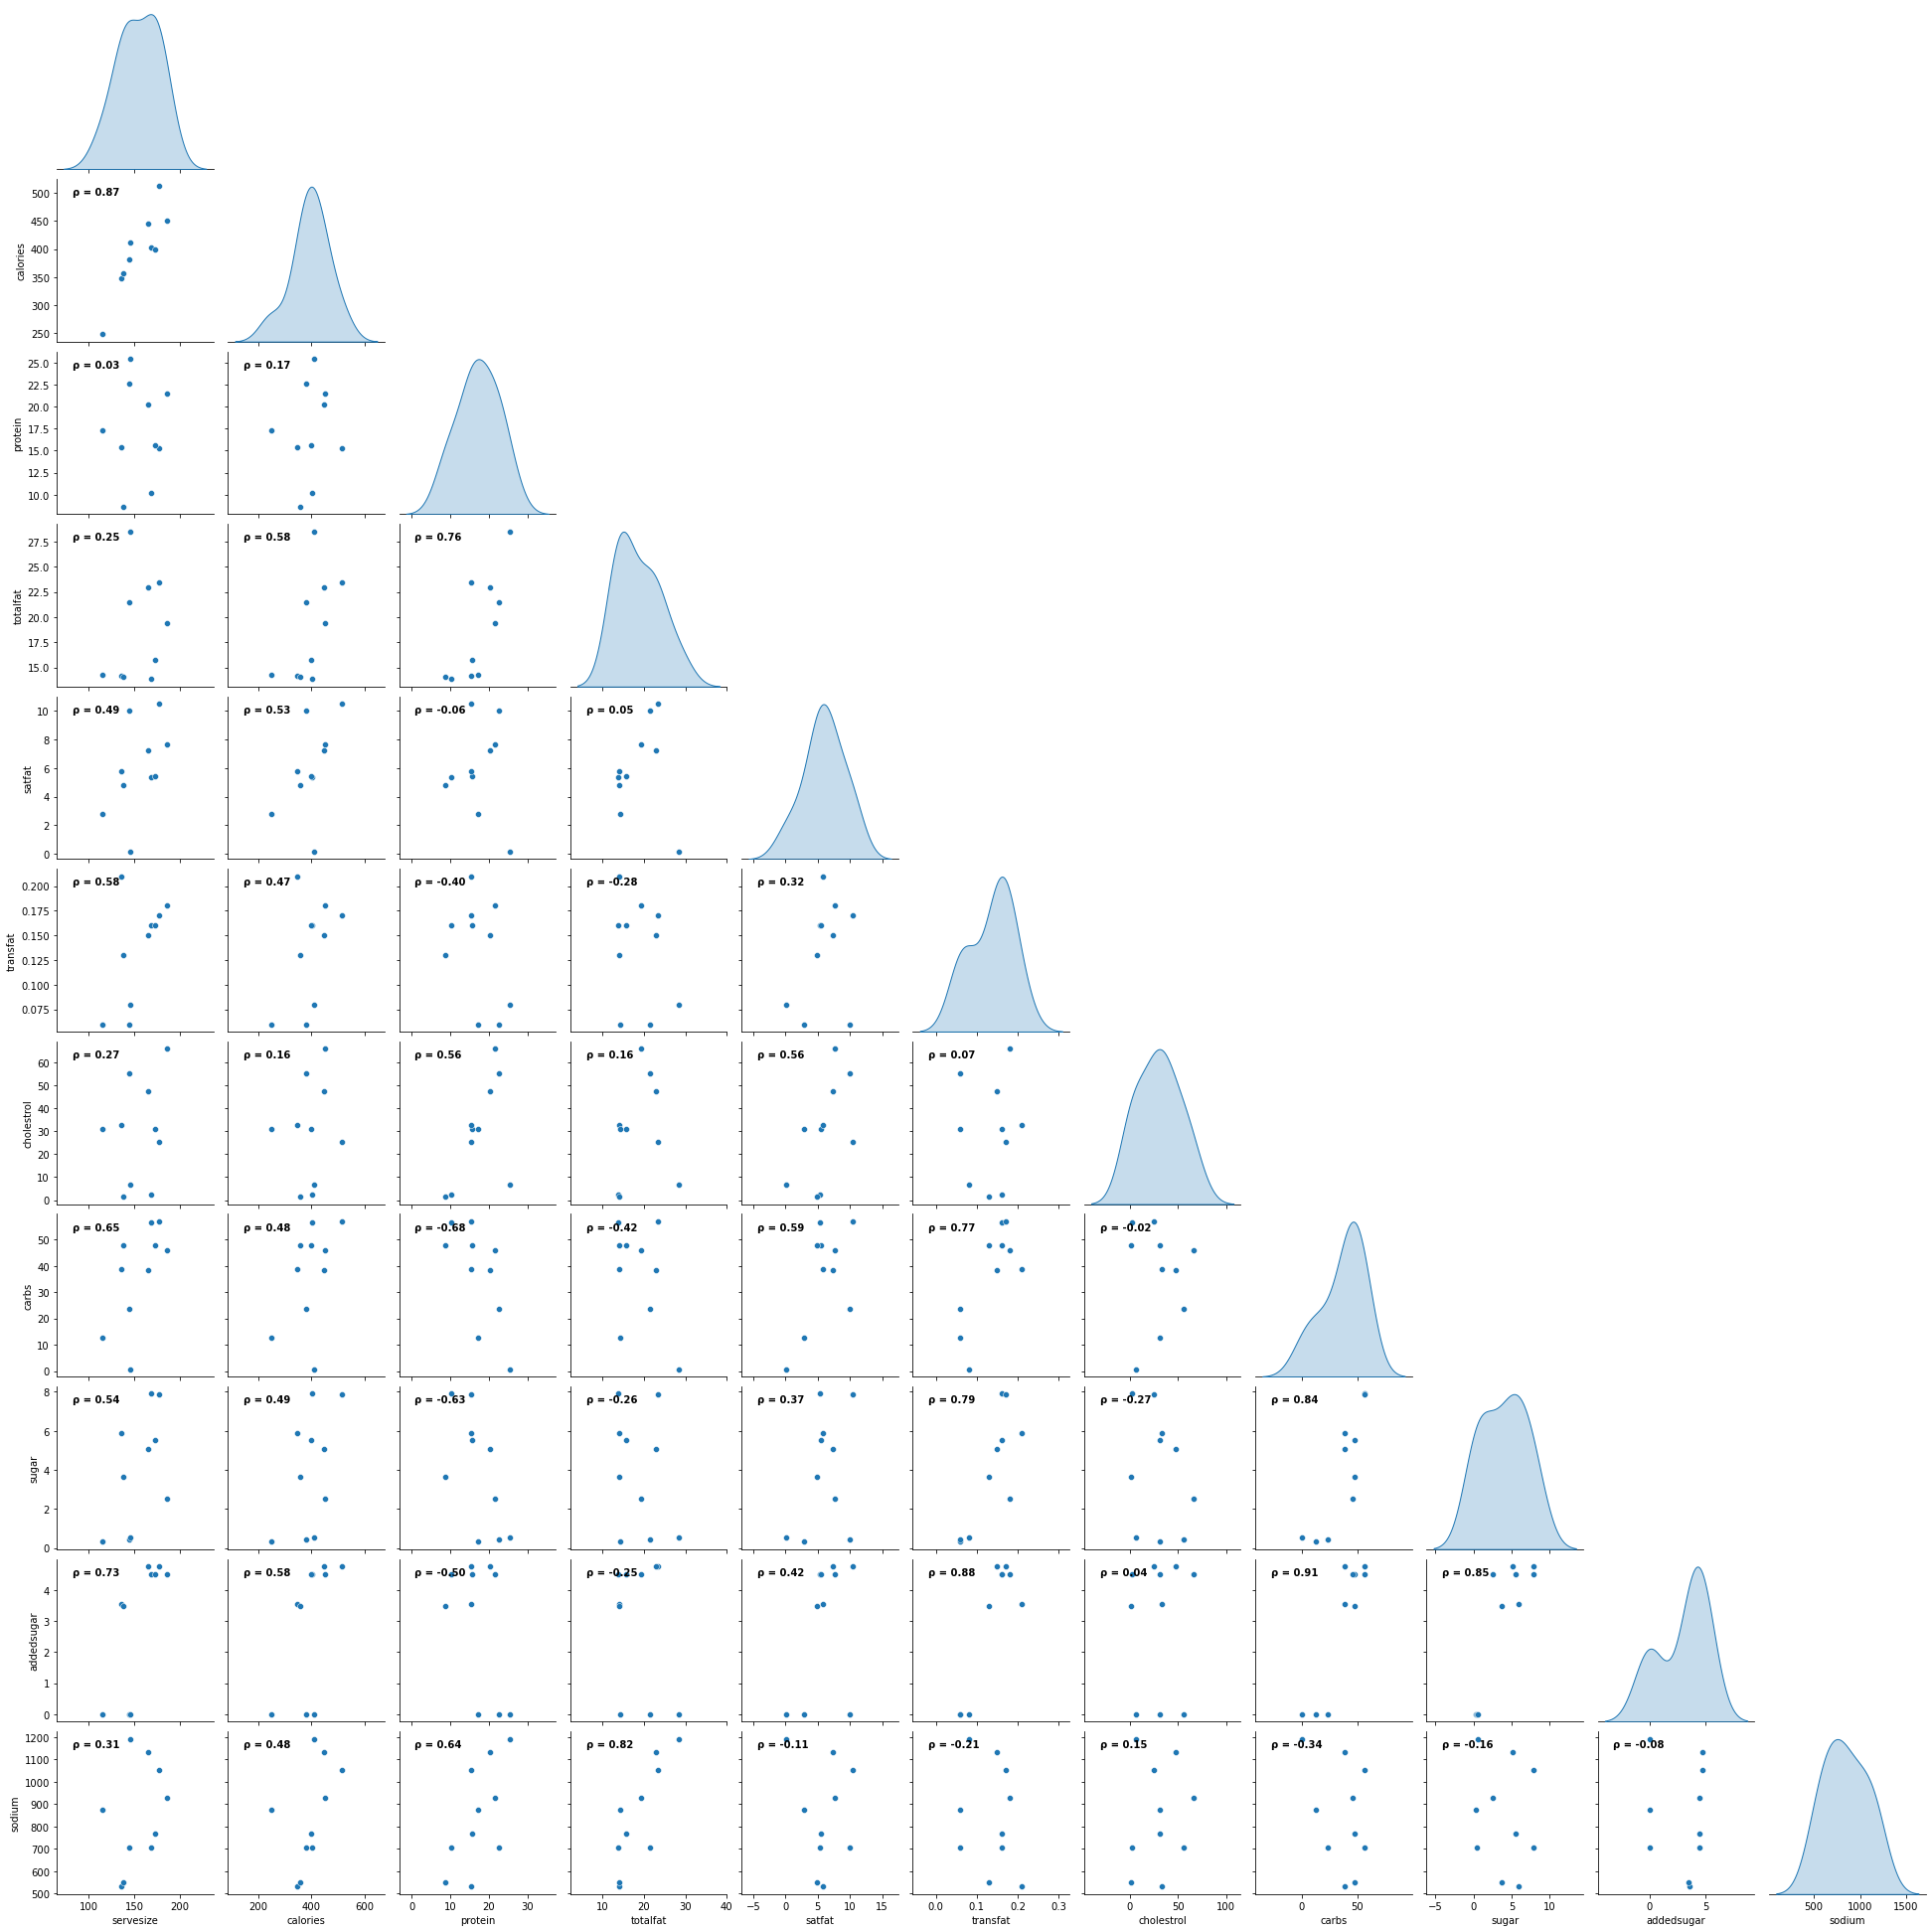

In [50]:
#Notice how compact are the density plots - that is a good sign of our classification :)
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes,weight='bold')

g1=sns.pairplot(mcoriginal_EM_C3,corner=True,palette='Set2',diag_kind='kde')
g1.map_lower(corrfunc)
plt.show()

### So based on the options we would get Medium Fries 5 piece Chicken Strips

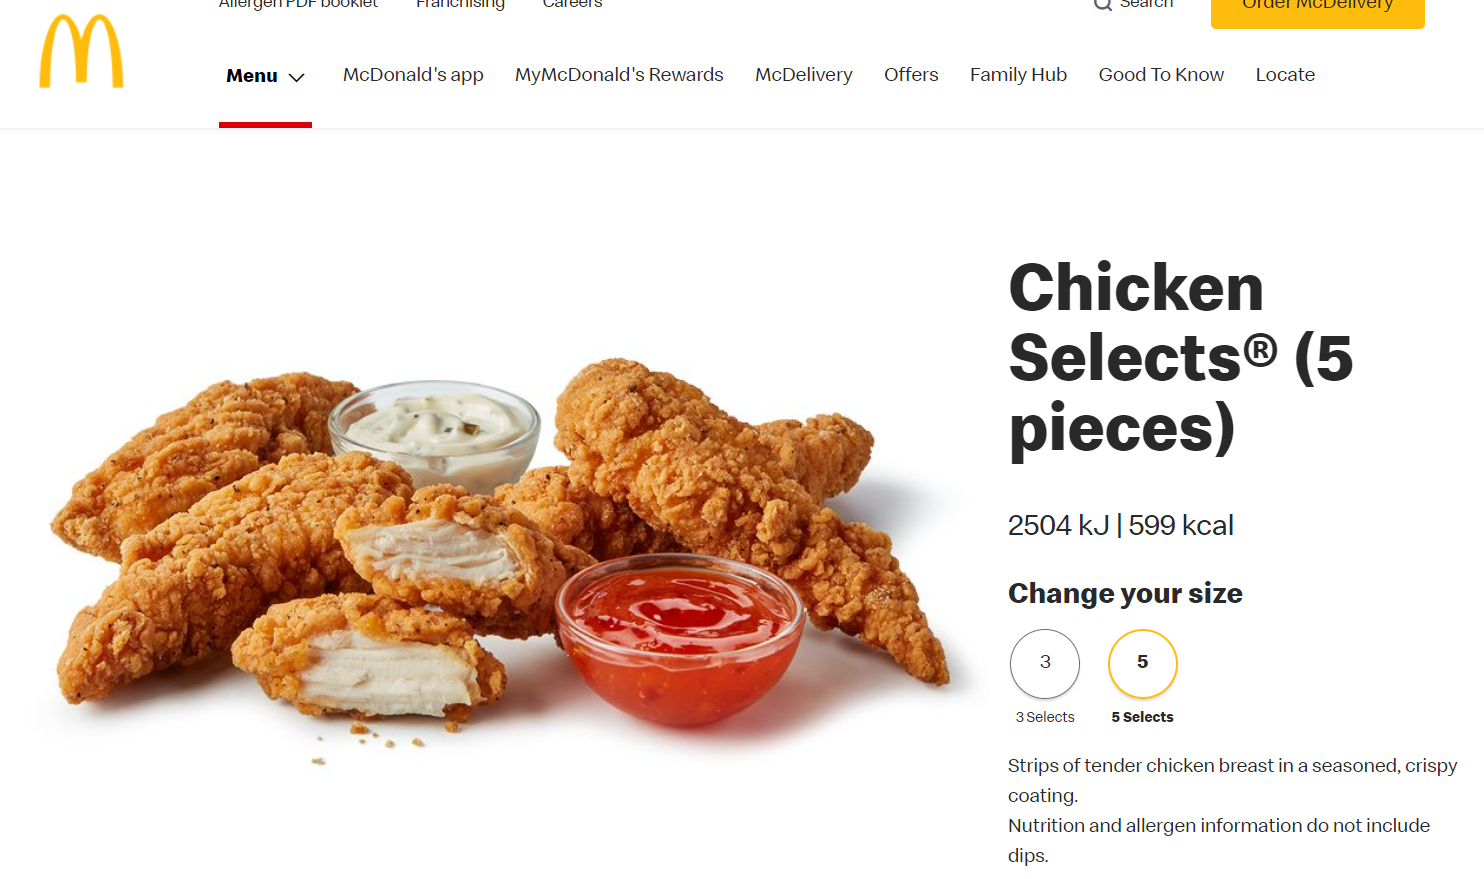

### Group 4:  Muffins

Among the clearly classified one we found the muffins. 

###### Here there are only two clearly classify items so we would take the Vainilla Chocochips Muffin

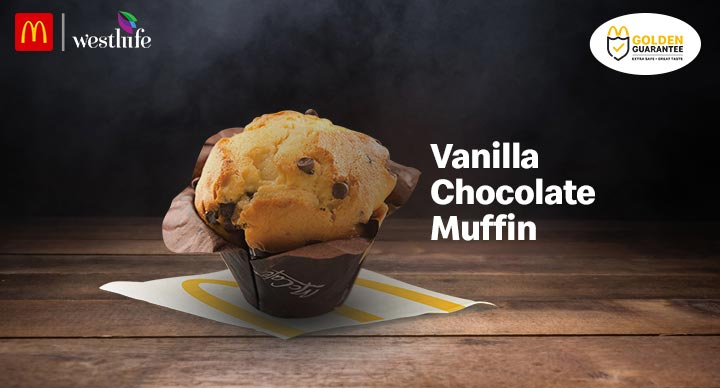

In [51]:
mcoriginal_EM_C4

item  servesize  calories  protein  totalfat  satfat  \
0   Double Chocochips Muffin         80     342.0     5.13     17.28    7.14   
1  Vanilla Chocochips Muffin         80     329.0     4.48     15.46    7.14   

   transfat  cholestrol  carbs  sugar  addedsugar  sodium     menu  
0      0.08       15.96  40.13  29.44         0.0  313.21  regular  
1      0.08       78.52  40.13  29.60         0.0  154.92  regular

### Group 5:  Egg based

Among the clearly classified one we found the eggs based foods. 

###### Here there are only two clearly classify items so we would take the Mc Egg Burger for Happy Meal	

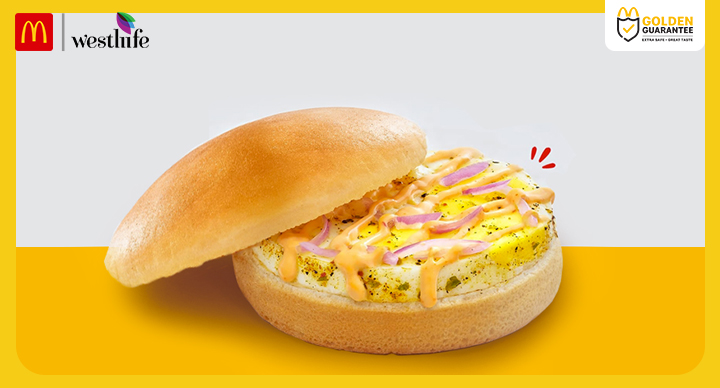

In [52]:
mcoriginal_EM_C5

item  servesize  calories  protein  totalfat  \
0          Mc Egg Masala Burger        126     290.0    12.45     12.27   
1  Mc Egg Burger for Happy Meal        123     282.0    12.29     12.21   

   satfat  transfat  cholestrol  carbs  sugar  addedsugar  sodium     menu  
0    3.64      0.11      213.09  32.89   4.66        3.64  757.91  regular  
1    3.63      0.11      213.09  31.32   3.28        3.64  399.41  regular